### 1 Re-code the house price machine learning

In [3]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [4]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
data = load_boston()
X, y = data['data'], data['target']
X.shape, y.shape

((506, 13), (506,))

In [3]:
def draw_rm_and_price():
    plt.scatter(X[:, 5], y)

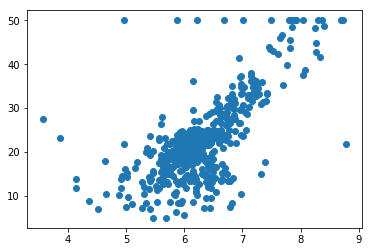

In [4]:
draw_rm_and_price()

In [5]:
def price(rm, k, b):
    return k * rm + b

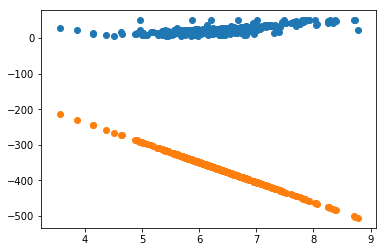

In [106]:
X_rm = X[:, 5]
k = np.random.randint(-100, 100)
b = np.random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b);

**Loss**
$$loss=\frac{1}{2n}\sum(y_i-\hat{y_i})^2$$

In [170]:
def mean_squared_error(y, y_hat):
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(y, y_hat)) / (2 * y.size)

#### 1.1 First-Method: Random generation: get best k and best b

In [108]:
trying_times = 2000

In [174]:
min_loss = float('inf')
best_k = best_b = None

for i in range(trying_times):
    k = np.random.random() * 200 - 100
    b = np.random.random() * 200 - 100
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
    
    current_loss = mean_squared_error(y, price_by_random_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        
        print('When time is : {time}, get best_k: {k} best_b: {b}, and the loss is: {loss}'.format(time=i, k=best_k, b=best_b, loss=min_loss))

When time is : 0, get best_k: 69.20417848778601 best_b: 39.00021323600092, and the loss is: 102788.30319386606
When time is : 1, get best_k: -51.65134676689789 best_b: 11.842033141784043, and the loss is: 57144.312219984495
When time is : 5, get best_k: -3.4760318659172356 best_b: -38.667321060031455, and the loss is: 3509.070376881545
When time is : 18, get best_k: -5.301244741428832 best_b: 31.239237709940625, and the loss is: 375.7316210836006
When time is : 70, get best_k: 7.57394961383406 best_b: -43.84517637229368, and the loss is: 198.691191809181
When time is : 75, get best_k: 0.9589407553076654 best_b: 8.032668638487749, and the loss is: 74.03636647463955
When time is : 120, get best_k: 4.218962269528333 best_b: -2.1602958986882044, and the loss is: 29.33345608823211
When time is : 536, get best_k: 5.893563854690015 best_b: -15.836407382220699, and the loss is: 25.221241011427637


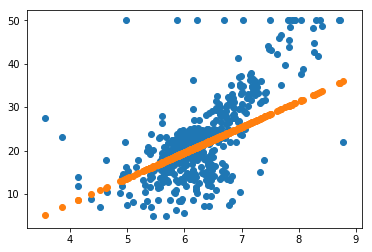

In [175]:
price_by_random_k_and_b = [price(r, best_k, best_b) for r in X_rm]
draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

#### 1.2 2nd-Method: Direction Adjusting

In [176]:
import random

In [177]:
min_loss = float('inf')
trying_times = 2000

best_k = np.random.random() * 200 - 100
best_b = np.random.random() * 200 - 100

direction = [
    (+1, -1),
    (+1, +1),
    (-1, -1),
    (-1, +1)
]

next_direction = random.choice(direction)

scalar = 0.1

for i in range(trying_times):
    k_direction, b_direction = next_direction
    current_k, current_b = best_k + scalar * k_direction, best_b + scalar * b_direction
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    current_loss = mean_squared_error(y, price_by_k_and_b)
    
    if current_loss < min_loss:
        best_k, best_b = current_k, current_b
        min_loss = current_loss
        
        print('When time is : {time}, get best_k: {k} best_b: {b}, and the loss is: {loss}'.format(time=i, k=best_k, b=best_b, loss=min_loss))
    else:
        next_direction = random.choice(direction)

When time is : 0, get best_k: -64.71672879920939 best_b: -45.32257887927064, and the loss is: 113975.5656367033
When time is : 2, get best_k: -64.6167287992094 best_b: -45.222578879270635, and the loss is: 113626.48488045577
When time is : 3, get best_k: -64.5167287992094 best_b: -45.122578879270634, and the loss is: 113277.93971014187
When time is : 4, get best_k: -64.41672879920941 best_b: -45.02257887927063, and the loss is: 112929.9301257618
When time is : 5, get best_k: -64.31672879920941 best_b: -44.92257887927063, and the loss is: 112582.45612731538
When time is : 6, get best_k: -64.21672879920942 best_b: -44.82257887927063, and the loss is: 112235.51771480245
When time is : 7, get best_k: -64.11672879920943 best_b: -44.72257887927063, and the loss is: 111889.1148882239
When time is : 8, get best_k: -64.01672879920943 best_b: -44.62257887927063, and the loss is: 111543.24764757854
When time is : 9, get best_k: -63.91672879920943 best_b: -44.522578879270625, and the loss is: 1111

When time is : 653, get best_k: 0.48327120079121044 best_b: 19.877421120729753, and the loss is: 40.17293614730073
When time is : 665, get best_k: 0.5832712007912104 best_b: 19.777421120729752, and the loss is: 40.09215648658309


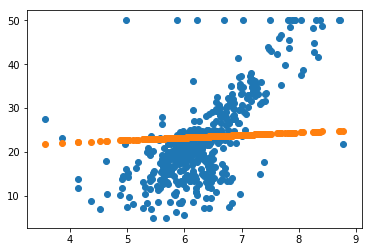

In [178]:
best_param_y = [price(r, best_k, best_b) for r in X_rm]
draw_rm_and_price()
plt.scatter(X_rm, best_param_y)

####  1.3 3nd-Method: Gradient Descent

$$\frac{\partial L}{\partial\hat{y_i}}=\hat{y_i}-y_i$$
$$\frac{\partial L}{\partial k}=\frac{1}{n}\sum\frac{\partial L}{\partial\hat{y_i}}*\frac{\partial\hat{y_i}}{\partial k}=\frac{1}{n} * \sum{(\hat{y_i}-y_i)}*x_i$$
$$\frac{\partial L}{\partial b}=\frac{1}{n}\sum\frac{\partial L}{\partial\hat{y_i}}=\frac{1}{n} * \sum{(\hat{y_i}-y_i)}$$

In [179]:
def train_by_gradient_descend(it, lr):

    k = random.random()
    b = random.random()

    for i in range(it):
        y_hat = np.array([price(r, k, b) for r in X_rm])
        print('When time is : {time}, get current k: {k} current b: {b}, and the loss is: {loss}'.format(time=i, k=k, b=b, loss=mean_squared_error(y, y_hat)))
        grad_y_hat = y_hat - y
        grad_k = (grad_y_hat * X_rm).sum() / X_rm.size
        grad_b = grad_y_hat.sum() / y.size
        k -= lr * grad_k
        b -= lr * grad_b
    return k, b

In [180]:
k, b = train_by_gradient_descend(10000, 0.03)

When time is : 0, get current k: 0.7764607461782008 current b: 0.36192207551022815, and the loss is: 188.36749281544166
When time is : 1, get current k: 4.1595705346175595 current b: 0.8806554457924314, and the loss is: 37.8948134591165
When time is : 2, get current k: 3.386230571254828 current b: 0.7459785715877965, and the loss is: 29.976583164189858
When time is : 3, get current k: 3.5660427399407433 current b: 0.7611467714151843, and the loss is: 29.55489847853216
When time is : 4, get current k: 3.5272780955078415 current b: 0.7419583130901164, and the loss is: 29.52744007943138
When time is : 5, get current k: 3.538636382901387 current b: 0.7306541570372949, and the loss is: 29.52071675441978
When time is : 6, get current k: 3.5384996376864057 current b: 0.717547645160011, and the loss is: 29.515087637190526
When time is : 7, get current k: 3.5409980319923675 current b: 0.7048601104494571, and the loss is: 29.509519866492226
When time is : 8, get current k: 3.5428912487800015 cur

When time is : 328, get current k: 4.149046293742648 current b: -3.163604512305944, and the loss is: 27.915635265069117
When time is : 329, get current k: 4.150832905036653 current b: -3.1749693575845304, and the loss is: 27.911224337804462
When time is : 330, get current k: 4.152618871884964 current b: -3.186330103468013, and the loss is: 27.906816592082894
When time is : 331, get current k: 4.154404194520039 current b: -3.1976867514350786, and the loss is: 27.902412025609596
When time is : 332, get current k: 4.156188873174251 current b: -3.209039302963879, and the loss is: 27.898010636091463
When time is : 333, get current k: 4.1579729080798895 current b: -3.2203877595320347, and the loss is: 27.893612421236917
When time is : 334, get current k: 4.15975629946916 current b: -3.231732122616632, and the loss is: 27.88921737875617
When time is : 335, get current k: 4.161539047574184 current b: -3.243072393694225, and the loss is: 27.884825506361057
When time is : 336, get current k: 4.1

When time is : 666, get current k: 4.717656841460769 current b: -6.7806033078895664, and the loss is: 26.59214560993106
When time is : 667, get current k: 4.719238350156533 current b: -6.790663471336651, and the loss is: 26.588689298125946
When time is : 668, get current k: 4.720819288388832 current b: -6.800720005998322, and the loss is: 26.585235479312498
When time is : 669, get current k: 4.7223996563634385 current b: -6.810772913183512, and the loss is: 26.58178415169256
When time is : 670, get current k: 4.723979454286049 current b: -6.820822194200683, and the loss is: 26.578335313469303
When time is : 671, get current k: 4.725558682362285 current b: -6.830867850357824, and the loss is: 26.574888962847105
When time is : 672, get current k: 4.727137340797697 current b: -6.840909882962452, and the loss is: 26.571445098031646
When time is : 673, get current k: 4.728715429797758 current b: -6.850948293321614, and the loss is: 26.568003717230045
When time is : 674, get current k: 4.730

When time is : 1055, get current k: 5.291748496699432 current b: -10.432468075235098, and the loss is: 25.419424893881487
When time is : 1056, get current k: 5.293122925715457 current b: -10.441210980401955, and the loss is: 25.416814449908355
When time is : 1057, get current k: 5.294496858963396 current b: -10.449950731929519, and the loss is: 25.414205888813704
When time is : 1058, get current k: 5.295870296622078 current b: -10.458687330955334, and the loss is: 25.411599209239455
When time is : 1059, get current k: 5.297243238870266 current b: -10.467420778616532, and the loss is: 25.408994409828434
When time is : 1060, get current k: 5.298615685886658 current b: -10.47615107604984, and the loss is: 25.406391489224553
When time is : 1061, get current k: 5.29998763784989 current b: -10.484878224391569, and the loss is: 25.40379044607262
When time is : 1062, get current k: 5.3013590949385305 current b: -10.493602224777623, and the loss is: 25.40119127901847
When time is : 1063, get cu

When time is : 1351, get current k: 5.677679599316716 current b: -12.887421362589475, and the loss is: 24.723423616174014
When time is : 1352, get current k: 5.678914819744003 current b: -12.895278745495416, and the loss is: 24.721315188651896
When time is : 1353, get current k: 5.680149594616912 current b: -12.903133294177376, and the loss is: 24.719208281910433
When time is : 1354, get current k: 5.681383924096158 current b: -12.910985009657686, and the loss is: 24.717102894852758
When time is : 1355, get current k: 5.682617808342398 current b: -12.918833892958304, and the loss is: 24.714999026382714
When time is : 1356, get current k: 5.683851247516231 current b: -12.926679945100823, and the loss is: 24.712896675405013
When time is : 1357, get current k: 5.685084241778201 current b: -12.934523167106462, and the loss is: 24.710795840825018
When time is : 1358, get current k: 5.686316791288787 current b: -12.942363559996078, and the loss is: 24.708696521549044
When time is : 1359, get

When time is : 1600, get current k: 5.971892201305663 current b: -14.758942443776116, and the loss is: 24.24271173284853
When time is : 1601, get current k: 5.973021296777398 current b: -14.766124753316017, and the loss is: 24.240950036404797
When time is : 1602, get current k: 5.974149984974917 current b: -14.77330447213657, and the loss is: 24.239189610649298
When time is : 1603, get current k: 5.9752782660451285 current b: -14.780481601172266, and the loss is: 24.23743045466538
When time is : 1604, get current k: 5.976406140134884 current b: -14.787656141357266, and the loss is: 24.23567256753727
When time is : 1605, get current k: 5.9775336073909875 current b: -14.794828093625387, and the loss is: 24.233915948349715
When time is : 1606, get current k: 5.9786606679601855 current b: -14.801997458910115, and the loss is: 24.23216059618823
When time is : 1607, get current k: 5.979787321989175 current b: -14.809164238144596, and the loss is: 24.23040651013883
When time is : 1608, get cu

When time is : 2069, get current k: 6.4591489705225875 current b: -17.858440253780273, and the loss is: 23.541503392142022
When time is : 2070, get current k: 6.460102308386979 current b: -17.864504548438767, and the loss is: 23.54024746793446
When time is : 2071, get current k: 6.4610553023744 current b: -17.870566655655267, and the loss is: 23.5389924496083
When time is : 2072, get current k: 6.462007952608889 current b: -17.8766265762188, and the loss is: 23.53773833651013
When time is : 2073, get current k: 6.462960259214441 current b: -17.882684310918112, and the loss is: 23.536485127987046
When time is : 2074, get current k: 6.463912222315005 current b: -17.88873986054166, and the loss is: 23.535232823386597
When time is : 2075, get current k: 6.464863842034486 current b: -17.894793225877617, and the loss is: 23.53398142205675
When time is : 2076, get current k: 6.465815118496745 current b: -17.90084440771388, and the loss is: 23.532730923346012
When time is : 2077, get current k

When time is : 2519, get current k: 6.855209077852377 current b: -20.377825335431503, and the loss is: 23.058742753257476
When time is : 2520, get current k: 6.856019553510996 current b: -20.382980866739953, and the loss is: 23.057835037868454
When time is : 2521, get current k: 6.856829736824241 current b: -20.388134538404977, and the loss is: 23.056927977202417
When time is : 2522, get current k: 6.857639627897563 current b: -20.393286351097363, and the loss is: 23.05602157078718
When time is : 2523, get current k: 6.858449226836375 current b: -20.39843630548766, and the loss is: 23.055115818150796
When time is : 2524, get current k: 6.859258533746053 current b: -20.403584402246175, and the loss is: 23.054210718821768
When time is : 2525, get current k: 6.860067548731935 current b: -20.40873064204297, and the loss is: 23.05330627232876
When time is : 2526, get current k: 6.86087627189932 current b: -20.41387502554786, and the loss is: 23.052402478201024
When time is : 2527, get curre

When time is : 2911, get current k: 7.151526089671315 current b: -22.262732815887446, and the loss is: 22.74870124201349
When time is : 2912, get current k: 7.152229681296089 current b: -22.267208445243256, and the loss is: 22.748017155436816
When time is : 2913, get current k: 7.152933019129457 current b: -22.27168246020198, and the loss is: 22.747333562282638
When time is : 2914, get current k: 7.153636103262963 current b: -22.276154861345947, and the loss is: 22.74665046219514
When time is : 2915, get current k: 7.15433893378812 current b: -22.280625649257278, and the loss is: 22.745967854818623
When time is : 2916, get current k: 7.155041510796407 current b: -22.285094824517873, and the loss is: 22.745285739797676
When time is : 2917, get current k: 7.155743834379267 current b: -22.289562387709434, and the loss is: 22.744604116777243
When time is : 2918, get current k: 7.156445904628116 current b: -22.294028339413444, and the loss is: 22.743922985402413
When time is : 2919, get cur

When time is : 3155, get current k: 7.315892793498923 current b: -23.30828881579695, and the loss is: 22.595596751621173
When time is : 3156, get current k: 7.316537096673713 current b: -23.312387304325792, and the loss is: 22.595023097274062
When time is : 3157, get current k: 7.3171811674429375 current b: -23.316484314495415, and the loss is: 22.594449856696187
When time is : 3158, get current k: 7.317825005890428 current b: -23.320579846839074, and the loss is: 22.59387702958913
When time is : 3159, get current k: 7.318468612099986 current b: -23.324673901889835, and the loss is: 22.593304615654613
When time is : 3160, get current k: 7.319111986155381 current b: -23.328766480180565, and the loss is: 22.592732614594652
When time is : 3161, get current k: 7.319755128140352 current b: -23.33285758224395, and the loss is: 22.592161026111427
When time is : 3162, get current k: 7.3203980381386105 current b: -23.33694720861247, and the loss is: 22.59158984990737
When time is : 3163, get cu

When time is : 3598, get current k: 7.5797259736431 current b: -24.98656280956316, and the loss is: 22.378002254962283
When time is : 3599, get current k: 7.580275109974842 current b: -24.990055930572773, and the loss is: 22.37758554862726
When time is : 3600, get current k: 7.580824048228499 current b: -24.99354779158431, and the loss is: 22.37716914285699
When time is : 3601, get current k: 7.581372788475519 current b: -24.997038393052264, and the loss is: 22.376753037434685
When time is : 3602, get current k: 7.581921330787325 current b: -25.000527735430964, and the loss is: 22.376337232143648
When time is : 3603, get current k: 7.582469675235314 current b: -25.004015819174576, and the loss is: 22.375921726767434
When time is : 3604, get current k: 7.583017821890857 current b: -25.007502644737098, and the loss is: 22.375506521089708
When time is : 3605, get current k: 7.5835657708253 current b: -25.010988212572364, and the loss is: 22.375091614894334
When time is : 3606, get current

When time is : 4097, get current k: 7.830540814537188 current b: -26.582025611069508, and the loss is: 22.20332097007286
When time is : 4098, get current k: 7.830999479850143 current b: -26.58494323525216, and the loss is: 22.20303025902193
When time is : 4099, get current k: 7.831457979718669 current b: -26.58785980702328, and the loss is: 22.202739757657024
When time is : 4100, get current k: 7.831916314202443 current b: -26.590775326762472, and the loss is: 22.202449465826852
When time is : 4101, get current k: 7.8323744833611215 current b: -26.59368979484922, and the loss is: 22.202159383380344
When time is : 4102, get current k: 7.832832487254337 current b: -26.59660321166286, and the loss is: 22.201869510166397
When time is : 4103, get current k: 7.833290325941705 current b: -26.599515577582597, and the loss is: 22.20157984603416
When time is : 4104, get current k: 7.833747999482813 current b: -26.6024268929875, and the loss is: 22.201290390832796
When time is : 4105, get current

When time is : 4394, get current k: 7.959743385681006 current b: -27.40389841326938, and the loss is: 22.12557626144628
When time is : 4395, get current k: 7.96015544654185 current b: -27.40651958103238, and the loss is: 22.125341626618138
When time is : 4396, get current k: 7.960567358768882 current b: -27.409139803318162, and the loss is: 22.125107161028964
When time is : 4397, get current k: 7.960979122415716 current b: -27.411759080467768, and the loss is: 22.124872864556693
When time is : 4398, get current k: 7.961390737535945 current b: -27.414377412822116, and the loss is: 22.124638737079323
When time is : 4399, get current k: 7.9618022041831455 current b: -27.416994800722, and the loss is: 22.12440477847504
When time is : 4400, get current k: 7.962213522410871 current b: -27.419611244508097, and the loss is: 22.12417098862196
When time is : 4401, get current k: 7.962624692272659 current b: -27.422226744520955, and the loss is: 22.12393736739836
When time is : 4402, get current 

When time is : 4806, get current k: 8.117526369335005 current b: -28.407574592211844, and the loss is: 22.04192135575747
When time is : 4807, get current k: 8.117881516549003 current b: -28.409833725550897, and the loss is: 22.041747060098515
When time is : 4808, get current k: 8.11823653565842 current b: -28.41209204400159, and the loss is: 22.041572890156687
When time is : 4809, get current k: 8.118591426709463 current b: -28.414349547857856, and the loss is: 22.04139884584134
When time is : 4810, get current k: 8.118946189748327 current b: -28.41660623741353, and the loss is: 22.041224927061872
When time is : 4811, get current k: 8.119300824821181 current b: -28.418862112962334, and the loss is: 22.041051133727652
When time is : 4812, get current k: 8.119655331974188 current b: -28.42111717479789, and the loss is: 22.04087746574823
When time is : 4813, get current k: 8.12000971125349 current b: -28.42337142321371, and the loss is: 22.040703923033266
When time is : 4814, get current 

When time is : 5096, get current k: 8.215332016318449 current b: -29.029727854686612, and the loss is: 21.996297129813325
When time is : 5097, get current k: 8.215651884214468 current b: -29.0317625721207, and the loss is: 21.996155742300836
When time is : 5098, get current k: 8.215971636731453 current b: -29.03379655561513, and the loss is: 21.99601445676928
When time is : 5099, get current k: 8.21629127391102 current b: -29.035829805434638, and the loss is: 21.995873273145097
When time is : 5100, get current k: 8.216610795794773 current b: -29.037862321843864, and the loss is: 21.995732191354776
When time is : 5101, get current k: 8.2169302024243 current b: -29.039894105107358, and the loss is: 21.995591211324886
When time is : 5102, get current k: 8.217249493841173 current b: -29.041925155489572, and the loss is: 21.99545033298199
When time is : 5103, get current k: 8.217568670086953 current b: -29.04395547325486, and the loss is: 21.9953095562528
When time is : 5104, get current k:

When time is : 5434, get current k: 8.317133824111593 current b: -29.67730116765754, and the loss is: 21.953874097441084
When time is : 5435, get current k: 8.317416971240881 current b: -29.67910229996104, and the loss is: 21.953763309096733
When time is : 5436, get current k: 8.317700016236621 current b: -29.680902782581, and the loss is: 21.95365260066264
When time is : 5437, get current k: 8.317982959135657 current b: -29.682702615751765, and the loss is: 21.953541972080988
When time is : 5438, get current k: 8.318265799974814 current b: -29.684501799707594, and the loss is: 21.953431423294283
When time is : 5439, get current k: 8.318548538790903 current b: -29.686300334682663, and the loss is: 21.953320954244955
When time is : 5440, get current k: 8.31883117562073 current b: -29.68809822091107, and the loss is: 21.953210564875445
When time is : 5441, get current k: 8.319113710501078 current b: -29.68989545862682, and the loss is: 21.953100255128355
When time is : 5442, get current 

When time is : 5682, get current k: 8.384316681777031 current b: -30.104659253494916, and the loss is: 21.9287074949505
When time is : 5683, get current k: 8.384575595485536 current b: -30.10630623414904, and the loss is: 21.928614858941394
When time is : 5684, get current k: 8.384834415801693 current b: -30.107952620723417, and the loss is: 21.92852228974933
When time is : 5685, get current k: 8.385093142759189 current b: -30.109598413432334, and the loss is: 21.928429787326206
When time is : 5686, get current k: 8.3853517763917 current b: -30.111243612490004, and the loss is: 21.92833735162387
When time is : 5687, get current k: 8.385610316732887 current b: -30.112888218110562, and the loss is: 21.92824498259419
When time is : 5688, get current k: 8.385868763816404 current b: -30.114532230508065, and the loss is: 21.92815268018907
When time is : 5689, get current k: 8.386127117675887 current b: -30.116175649896494, and the loss is: 21.92806044436044
When time is : 5690, get current k

When time is : 6049, get current k: 8.473332153687304 current b: -30.670897175003493, and the loss is: 21.898828327879656
When time is : 6050, get current k: 8.473558958767775 current b: -30.67233990888557, and the loss is: 21.898757243315746
When time is : 6051, get current k: 8.473785682037752 current b: -30.673782122361423, and the loss is: 21.898686210024156
When time is : 6052, get current k: 8.47401232352674 current b: -30.675223815618768, and the loss is: 21.898615227967962
When time is : 6053, get current k: 8.47423888326424 current b: -30.676664988845253, and the loss is: 21.898544297110167
When time is : 6054, get current k: 8.474465361279742 current b: -30.678105642228456, and the loss is: 21.89847341741387
When time is : 6055, get current k: 8.474691757602722 current b: -30.679545775955887, and the loss is: 21.898402588842146
When time is : 6056, get current k: 8.474918072262646 current b: -30.680985390214992, and the loss is: 21.8983318113581
When time is : 6057, get curre

When time is : 6280, get current k: 8.52360946067302 current b: -30.99071705794853, and the loss is: 21.88369783641782
When time is : 6281, get current k: 8.523818130306767 current b: -30.992044430113832, and the loss is: 21.883637665275856
When time is : 6282, get current k: 8.524026724671625 current b: -30.99337132348485, and the loss is: 21.88357753753454
When time is : 6283, get current k: 8.524235243794745 current b: -30.99469773823429, and the loss is: 21.88351745316256
When time is : 6284, get current k: 8.524443687703267 current b: -30.996023674534793, and the loss is: 21.883457412128628
When time is : 6285, get current k: 8.524652056424321 current b: -30.99734913255894, and the loss is: 21.8833974144015
When time is : 6286, get current k: 8.524860349985026 current b: -30.998674112479254, and the loss is: 21.88333745994993
When time is : 6287, get current k: 8.525068568412498 current b: -30.999998614468183, and the loss is: 21.883277548742704
When time is : 6288, get current k:

When time is : 6593, get current k: 8.585381498444816 current b: -31.383656279913318, and the loss is: 21.866833455375666
When time is : 6594, get current k: 8.585567886385942 current b: -31.384841915602397, and the loss is: 21.866785448287118
When time is : 6595, get current k: 8.585754207095372 current b: -31.386027123622732, and the loss is: 21.866737475825445
When time is : 6596, get current k: 8.585940460597358 current b: -31.387211904128584, and the loss is: 21.866689537965673
When time is : 6597, get current k: 8.586126646916142 current b: -31.38839625727416, and the loss is: 21.86664163468282
When time is : 6598, get current k: 8.586312766075958 current b: -31.389580183213614, and the loss is: 21.86659376595198
When time is : 6599, get current k: 8.586498818101031 current b: -31.390763682101042, and the loss is: 21.866545931748206
When time is : 6600, get current k: 8.586684803015578 current b: -31.391946754090483, and the loss is: 21.866498132046615
When time is : 6601, get cu

When time is : 7015, get current k: 8.65835548473318 current b: -31.847852418330362, and the loss is: 21.84936191587119
When time is : 7016, get current k: 8.658515550344811 current b: -31.848870614575233, and the loss is: 21.849326510771384
When time is : 7017, get current k: 8.65867555821943 current b: -31.84988844354817, and the loss is: 21.849291131208776
When time is : 7018, get current k: 8.658835508377868 current b: -31.85090590538165, and the loss is: 21.849255777164956
When time is : 7019, get current k: 8.658995400840938 current b: -31.851923000208107, and the loss is: 21.849220448621594
When time is : 7020, get current k: 8.659155235629456 current b: -31.852939728159917, and the loss is: 21.84918514556022
When time is : 7021, get current k: 8.659315012764223 current b: -31.853956089369422, and the loss is: 21.849149867962442
When time is : 7022, get current k: 8.659474732266037 current b: -31.854972083968907, and the loss is: 21.849114615809967
When time is : 7023, get curre

When time is : 7584, get current k: 8.74070762968087 current b: -32.37170413069286, and the loss is: 21.832833597772513
When time is : 7585, get current k: 8.740837990182442 current b: -32.37253336922717, and the loss is: 21.832810114328357
When time is : 7586, get current k: 8.740968303661887 current b: -32.373362308648176, and the loss is: 21.83278664782253
When time is : 7587, get current k: 8.741098570136167 current b: -32.374190949063774, and the loss is: 21.832763198242766
When time is : 7588, get current k: 8.741228789622236 current b: -32.37501929058182, and the loss is: 21.83273976557687
When time is : 7589, get current k: 8.741358962137044 current b: -32.37584733331012, and the loss is: 21.83271634981263
When time is : 7590, get current k: 8.74148908769753 current b: -32.37667507735646, and the loss is: 21.832692950937897
When time is : 7591, get current k: 8.741619166320637 current b: -32.37750252282857, and the loss is: 21.832669568940446
When time is : 7592, get current k:

When time is : 7876, get current k: 8.776842995324914 current b: -32.601565455877555, and the loss is: 21.82664840587291
When time is : 7877, get current k: 8.776960321496729 current b: -32.6023117815021, and the loss is: 21.826629383725297
When time is : 7878, get current k: 8.77707760534801 current b: -32.60305783792073, and the loss is: 21.826610375298113
When time is : 7879, get current k: 8.777194846894021 current b: -32.60380362523055, and the loss is: 21.82659138058145
When time is : 7880, get current k: 8.777312046150024 current b: -32.60454914352862, and the loss is: 21.826572399565443
When time is : 7881, get current k: 8.77742920313127 current b: -32.605294392911986, and the loss is: 21.826553432240168
When time is : 7882, get current k: 8.777546317853009 current b: -32.60603937347764, and the loss is: 21.826534478595782
When time is : 7883, get current k: 8.777663390330487 current b: -32.60678408532255, and the loss is: 21.826515538622413
When time is : 7884, get current k:

When time is : 8232, get current k: 8.81604716966841 current b: -32.850947835348606, and the loss is: 21.82067419166025
When time is : 8233, get current k: 8.81615035456541 current b: -32.85160420665523, and the loss is: 21.820659478633775
When time is : 8234, get current k: 8.81625350224275 current b: -32.85226034120321, and the loss is: 21.820644776219616
When time is : 8235, get current k: 8.816356612713856 current b: -32.852916239077956, and the loss is: 21.8206300844101
When time is : 8236, get current k: 8.81645968599215 current b: -32.85357190036483, and the loss is: 21.820615403197614
When time is : 8237, get current k: 8.816562722091048 current b: -32.85422732514917, and the loss is: 21.82060073257447
When time is : 8238, get current k: 8.816665721023957 current b: -32.85488251351629, and the loss is: 21.820586072533064
When time is : 8239, get current k: 8.81676868280429 current b: -32.855537465551464, and the loss is: 21.820571423065775
When time is : 8240, get current k: 8.

When time is : 8591, get current k: 8.850798227145095 current b: -33.07200341291896, and the loss is: 21.816019211327806
When time is : 8592, get current k: 8.850888877043916 current b: -33.07258004762292, and the loss is: 21.81600785587666
When time is : 8593, get current k: 8.850979494244555 current b: -33.0731564743299, and the loss is: 21.815996508616003
When time is : 8594, get current k: 8.851070078758811 current b: -33.07373269311493, and the loss is: 21.815985169540024
When time is : 8595, get current k: 8.851160630598471 current b: -33.074308704053, and the loss is: 21.815973838642734
When time is : 8596, get current k: 8.851251149775324 current b: -33.074884507219096, and the loss is: 21.815962515918294
When time is : 8597, get current k: 8.851341636301148 current b: -33.075460102688155, and the loss is: 21.815951201360765
When time is : 8598, get current k: 8.851432090187723 current b: -33.07603549053509, and the loss is: 21.81593989496431
When time is : 8599, get current k:

When time is : 9074, get current k: 8.890986878235468 current b: -33.32764816515466, and the loss is: 21.811386593770404
When time is : 9075, get current k: 8.891063031750441 current b: -33.32813258665026, and the loss is: 21.8113785797646
When time is : 9076, get current k: 8.891139157796204 current b: -33.32861683341096, and the loss is: 21.811370571539186
When time is : 9077, get current k: 8.89121525638266 current b: -33.32910090549979, and the loss is: 21.811362569089972
When time is : 9078, get current k: 8.89129132751972 current b: -33.32958480297975, and the loss is: 21.811354572412824
When time is : 9079, get current k: 8.891367371217282 current b: -33.33006852591383, and the loss is: 21.81134658150359
When time is : 9080, get current k: 8.891443387485241 current b: -33.33055207436499, and the loss is: 21.811338596358087
When time is : 9081, get current k: 8.891519376333497 current b: -33.33103544839616, and the loss is: 21.811330616972178
When time is : 9082, get current k: 8

When time is : 9457, get current k: 8.918233202184135 current b: -33.5009652471221, and the loss is: 21.808703863449534
When time is : 9458, get current k: 8.918299527721318 current b: -33.50138715169118, and the loss is: 21.80869778446134
When time is : 9459, get current k: 8.918365829334325 current b: -33.501808904075745, and the loss is: 21.808691709857882
When time is : 9460, get current k: 8.918432107031782 current b: -33.502230504330676, and the loss is: 21.80868563963595
When time is : 9461, get current k: 8.918498360822316 current b: -33.50265195251086, and the loss is: 21.80867957379236
When time is : 9462, get current k: 8.918564590714553 current b: -33.50307324867114, and the loss is: 21.80867351232399
When time is : 9463, get current k: 8.918630796717112 current b: -33.503494392866365, and the loss is: 21.80866745522767
When time is : 9464, get current k: 8.918696978838609 current b: -33.503915385151345, and the loss is: 21.808661402500263
When time is : 9465, get current k

When time is : 9928, get current k: 8.946967712472203 current b: -33.68374885801485, and the loss is: 21.80627557836323
When time is : 9929, get current k: 8.947023673230289 current b: -33.68410483100095, and the loss is: 21.80627125086475
When time is : 9930, get current k: 8.94707961380286 current b: -33.68446067558461, and the loss is: 21.806266926487638
When time is : 9931, get current k: 8.947135534197198 current b: -33.684816391812134, and the loss is: 21.806262605229634
When time is : 9932, get current k: 8.947191434420578 current b: -33.68517197972983, and the loss is: 21.806258287088482
When time is : 9933, get current k: 8.94724731448028 current b: -33.68552743938398, and the loss is: 21.806253972061974
When time is : 9934, get current k: 8.947303174383576 current b: -33.685882770820854, and the loss is: 21.806249660147827
When time is : 9935, get current k: 8.947359014137735 current b: -33.68623797408669, and the loss is: 21.80624535134381
When time is : 9936, get current k:

When time is : 0, get current k: 0.897789480763808 current b: 0.7604928722302827, and the loss is: 168.47115632642848
When time is : 1, get current k: 1.4248574827435263 current b: 0.84114304627263, and the loss is: 117.43506148327326
When time is : 2, get current k: 1.8440057333535054 current b: 0.904827820996193, and the loss is: 85.16941343904332
When time is : 3, get current k: 2.1773455290942545 current b: 0.955023204300229, and the loss is: 64.77054457833563
When time is : 4, get current k: 2.4424578602071128 current b: 0.9944930169728192, and the loss is: 51.87391847131279
When time is : 5, get current k: 2.6533216092899465 current b: 1.0254348102189321, and the loss is: 43.72025131281432
When time is : 6, get current k: 2.8210515745425946 current b: 1.049595886656155, and the loss is: 38.565108787805364
When time is : 7, get current k: 2.9544852820089984 current b: 1.0683655501741112, and the loss is: 35.30564998018086
When time is : 8, get current k: 3.0606495679099965 current

When time is : 293, get current k: 3.566989761040167 current b: 0.5389257805195783, and the loss is: 29.437372663705176
When time is : 294, get current k: 3.5673225217021525 current b: 0.5368090506797101, and the loss is: 29.436454436332447
When time is : 295, get current k: 3.56765526235921 current b: 0.5346924480935459, and the loss is: 29.43553631936047
When time is : 296, get current k: 3.5679879830125434 current b: 0.5325759727534354, and the loss is: 29.43461831277598
When time is : 297, get current k: 3.5683206836633543 current b: 0.5304596246517288, and the loss is: 29.433700416565735
When time is : 298, get current k: 3.5686533643128455 current b: 0.5283434037807769, and the loss is: 29.432782630716464
When time is : 299, get current k: 3.5689860249622196 current b: 0.5262273101329308, and the loss is: 29.431864955214934
When time is : 300, get current k: 3.569318665612679 current b: 0.524111343700542, and the loss is: 29.43094739004782
When time is : 301, get current k: 3.569

When time is : 616, get current k: 3.6734377985327207 current b: -0.13820274786937184, and the loss is: 29.146453240038692
When time is : 617, get current k: 3.6737641597445743 current b: -0.14027877005175438, and the loss is: 29.145569990640638
When time is : 618, get current k: 3.674090501336223 current b: -0.14235466742769856, and the loss is: 29.144686847437885
When time is : 619, get current k: 3.6744168233088463 current b: -0.1444304400047075, and the loss is: 29.143803810417683
When time is : 620, get current k: 3.674743125663624 current b: -0.1465060877902839, and the loss is: 29.14292087956722
When time is : 621, get current k: 3.675069408401735 current b: -0.14858161079192997, and the loss is: 29.142038054873773
When time is : 622, get current k: 3.6753956715243588 current b: -0.15065700901714746, and the loss is: 29.14115533632455
When time is : 623, get current k: 3.6757219150326748 current b: -0.1527322824734377, and the loss is: 29.14027272390683
When time is : 624, get c

When time is : 1068, get current k: 3.81897116994621 current b: -1.0639576977771348, and the loss is: 28.75785596996412
When time is : 1069, get current k: 3.8192887819732517 current b: -1.0659780653624407, and the loss is: 28.757019442594213
When time is : 1070, get current k: 3.8196063749060727 current b: -1.067998311487155, and the loss is: 28.756183015802062
When time is : 1071, get current k: 3.8199239487458208 current b: -1.0700184361585796, and the loss is: 28.755346689575592
When time is : 1072, get current k: 3.820241503493644 current b: -1.0720384393840163, and the loss is: 28.754510463902754
When time is : 1073, get current k: 3.8205590391506896 current b: -1.074058321170766, and the loss is: 28.75367433877146
When time is : 1074, get current k: 3.820876555718106 current b: -1.0760780815261293, and the loss is: 28.75283831416959
When time is : 1075, get current k: 3.8211940531970403 current b: -1.0780977204574065, and the loss is: 28.752002390085007
When time is : 1076, get 

When time is : 1447, get current k: 3.9379886649749354 current b: -1.821042028871336, and the loss is: 28.447908949611943
When time is : 1448, get current k: 3.938299121900369 current b: -1.823016882010941, and the loss is: 28.447109687952576
When time is : 1449, get current k: 3.9386095601617326 current b: -1.8249916164261948, and the loss is: 28.446310522390483
When time is : 1450, get current k: 3.9389199797601484 current b: -1.8269662321242348, and the loss is: 28.445511452914065
When time is : 1451, get current k: 3.9392303806967384 current b: -1.8289407291121982, and the loss is: 28.44471247951175
When time is : 1452, get current k: 3.9395407629726242 current b: -1.8309151073972216, and the loss is: 28.443913602172067
When time is : 1453, get current k: 3.939851126588928 current b: -1.8328893669864412, and the loss is: 28.443114820883345
When time is : 1454, get current k: 3.9401614715467717 current b: -1.8348635078869928, and the loss is: 28.442316135634197
When time is : 1455, 

When time is : 1687, get current k: 4.011965585459218 current b: -2.2916179500645555, and the loss is: 28.25881611785436
When time is : 1688, get current k: 4.012271595035272 current b: -2.293564513089924, and the loss is: 28.258039591302246
When time is : 1689, get current k: 4.012577586214621 current b: -2.295510959091688, and the loss is: 28.257263158113822
When time is : 1690, get current k: 4.012883558998373 current b: -2.2974572880768833, and the loss is: 28.25648681827795
When time is : 1691, get current k: 4.013189513387633 current b: -2.2994035000525446, and the loss is: 28.255710571783364
When time is : 1692, get current k: 4.013495449383507 current b: -2.3013495950257057, and the loss is: 28.254934418618856
When time is : 1693, get current k: 4.0138013669871 current b: -2.303295573003401, and the loss is: 28.25415835877321
When time is : 1694, get current k: 4.0141072661995185 current b: -2.305241433992664, and the loss is: 28.25338239223516
When time is : 1695, get current 

When time is : 27, get current k: 3.452186912712568 current b: 1.26918663764334, and the loss is: 29.757451243106942
When time is : 28, get current k: 3.452867092758777 current b: 1.2648655086760217, and the loss is: 29.755537878112282
When time is : 29, get current k: 3.453546840555453 current b: 1.2605448441692964, and the loss is: 29.753624973240004
When time is : 30, get current k: 3.4542262997666144 current b: 1.2562246666438612, and the loss is: 29.751712528354155
When time is : 31, get current k: 3.4549055551906664 current b: 1.2519049893664478, and the loss is: 29.74980054333535
When time is : 32, get current k: 3.455584656881938 current b: 1.2475858201418506, and the loss is: 29.747889018069927
When time is : 33, get current k: 3.456263634387868 current b: 1.2432671635510846, and the loss is: 29.74597795244621
When time is : 34, get current k: 3.4569425051521736 current b: 1.2389490222724062, and the loss is: 29.744067346353365
When time is : 35, get current k: 3.4576212794746

When time is : 280, get current k: 3.621480328175526 current b: 0.19230485255718047, and the loss is: 29.287745773307908
When time is : 281, get current k: 3.6221392977644857 current b: 0.1881130692370162, and the loss is: 29.285945352720013
When time is : 282, get current k: 3.6227981881214912 current b: 0.18392178992066366, and the loss is: 29.28414536505724
When time is : 283, get current k: 3.623456999256069 current b: 0.17973101454752333, and the loss is: 29.282345810215585
When time is : 284, get current k: 3.6241157311777443 current b: 0.175540743057003, and the loss is: 29.28054668809095
When time is : 285, get current k: 3.6247743838960416 current b: 0.17135097538851785, and the loss is: 29.278747998579256
When time is : 286, get current k: 3.6254329574204838 current b: 0.1671617114814902, and the loss is: 29.276949741576512
When time is : 287, get current k: 3.626091451760593 current b: 0.16297295127534972, and the loss is: 29.275151916978704
When time is : 288, get current k

When time is : 565, get current k: 3.8061162068198517 current b: -0.982185760320291, and the loss is: 28.791755614804995
When time is : 566, get current k: 3.806752976504976 current b: -0.9862363274323509, and the loss is: 28.790074458922806
When time is : 567, get current k: 3.807389669627376 current b: -0.9902864075198897, and the loss is: 28.78839370728768
When time is : 568, get current k: 3.8080262861962577 current b: -0.9943360006414654, and the loss is: 28.786713359802373
When time is : 569, get current k: 3.808662826220826 current b: -0.998385106855629, and the loss is: 28.785033416369746
When time is : 570, get current k: 3.809299289710284 current b: -1.0024337262209242, and the loss is: 28.783353876892647
When time is : 571, get current k: 3.809935676673834 current b: -1.0064818587958877, and the loss is: 28.781674741273882
When time is : 572, get current k: 3.8105719871206776 current b: -1.0105295046390497, and the loss is: 28.779996009416454
When time is : 573, get current 

When time is : 933, get current k: 4.03535233809694 current b: -2.4403838434562957, and the loss is: 28.199604703439892
When time is : 934, get current k: 4.0359615453163755 current b: -2.4442590824714703, and the loss is: 28.198065934867117
When time is : 935, get current k: 4.036570679287091 current b: -2.448133855542896, and the loss is: 28.196527536303318
When time is : 936, get current k: 4.037179740017894 current b: -2.452008162726596, and the loss is: 28.194989507659432
When time is : 937, get current k: 4.037788727517591 current b: -2.455882004078587, and the loss is: 28.19345184884655
When time is : 938, get current k: 4.038397641794987 current b: -2.459755379654879, and the loss is: 28.1919145597757
When time is : 939, get current k: 4.039006482858885 current b: -2.4636282895114747, and the loss is: 28.190377640358054
When time is : 940, get current k: 4.0396152507180885 current b: -2.4675007337043704, and the loss is: 28.188841090504653
When time is : 941, get current k: 4.0

When time is : 1185, get current k: 4.18657903191759 current b: -3.402354689063161, and the loss is: 27.823305909049502
When time is : 1186, get current k: 4.187170056224338 current b: -3.406114264424975, and the loss is: 27.82185762445959
When time is : 1187, get current k: 4.18776100946861 current b: -3.40987338774999, and the loss is: 27.820409688120986
When time is : 1188, get current k: 4.188351891658949 current b: -3.4136320590925577, and the loss is: 27.818962099949996
When time is : 1189, get current k: 4.1889427028038995 current b: -3.4173902785070225, and the loss is: 27.81751485986289
When time is : 1190, get current k: 4.189533442912004 current b: -3.4211480460477226, and the loss is: 27.816067967775925
When time is : 1191, get current k: 4.1901241119918025 current b: -3.4249053617689893, and the loss is: 27.814621423605516
When time is : 1192, get current k: 4.190714710051836 current b: -3.428662225725148, and the loss is: 27.8131752272679
When time is : 1193, get current 

When time is : 1491, get current k: 4.364156377480639 current b: -4.531945140035401, and the loss is: 27.395993100469102
When time is : 1492, get current k: 4.364726050574265 current b: -4.535568897810895, and the loss is: 27.39464756657991
When time is : 1493, get current k: 4.365295655172601 current b: -4.53919221987977, and the loss is: 27.393302356234894
When time is : 1494, get current k: 4.365865191283884 current b: -4.542815106294416, and the loss is: 27.391957469356214
When time is : 1495, get current k: 4.366434658916349 current b: -4.546437557107214, and the loss is: 27.39061290586607
When time is : 1496, get current k: 4.367004058078228 current b: -4.550059572370538, and the loss is: 27.389268665686703
When time is : 1497, get current k: 4.367573388777754 current b: -4.5536811521367575, and the loss is: 27.387924748740406
When time is : 1498, get current k: 4.36814265102316 current b: -4.557302296458236, and the loss is: 27.38658115494945
When time is : 1499, get current k: 

When time is : 1838, get current k: 4.5577773722420885 current b: -5.763591136864572, and the loss is: 26.94798935594706
When time is : 1839, get current k: 4.558323765096273 current b: -5.767066806289684, and the loss is: 26.946751548055783
When time is : 1840, get current k: 4.558870092254294 current b: -5.770542057813749, and the loss is: 26.94551403780506
When time is : 1841, get current k: 4.559416353724051 current b: -5.7740168914870145, and the loss is: 26.944276825123353
When time is : 1842, get current k: 4.5599625495134415 current b: -5.77749130735972, and the loss is: 26.94303990993909
When time is : 1843, get current k: 4.560508679630364 current b: -5.780965305482101, and the loss is: 26.94180329218073
When time is : 1844, get current k: 4.561054744082713 current b: -5.784438885904386, and the loss is: 26.940566971776782
When time is : 1845, get current k: 4.561600742878385 current b: -5.787912048676797, and the loss is: 26.939330948655687
When time is : 1846, get current k

When time is : 432, get current k: 4.555491249661723 current b: -5.749048841346272, and the loss is: 26.953169992028467
When time is : 433, get current k: 4.557677920576603 current b: -5.762958513084162, and the loss is: 26.948214671493552
When time is : 434, get current k: 4.559863539824075 current b: -5.7768614950415555, and the loss is: 26.943264116281078
When time is : 435, get current k: 4.562048107909931 current b: -5.790757790435866, and the loss is: 26.938318321808367
When time is : 436, get current k: 4.564231625339723 current b: -5.804647402482959, and the loss is: 26.933377283497187
When time is : 437, get current k: 4.566414092618755 current b: -5.818530334397154, and the loss is: 26.928440996773787
When time is : 438, get current k: 4.568595510252095 current b: -5.832406589391225, and the loss is: 26.92350945706877
When time is : 439, get current k: 4.570775878744564 current b: -5.8462761706764, and the loss is: 26.918582659817094
When time is : 440, get current k: 4.57295

When time is : 736, get current k: 5.174066149830159 current b: -9.683876779143587, and the loss is: 25.64643072681012
When time is : 737, get current k: 5.175955320532192 current b: -9.695894016919635, and the loss is: 25.642732042212447
When time is : 738, get current k: 5.1778435826479114 current b: -9.707905475070943, and the loss is: 25.63903691448344
When time is : 739, get current k: 5.179730936614303 current b: -9.71991115637719, and the loss is: 25.635345340202615
When time is : 740, get current k: 5.181617382868132 current b: -9.73191106361672, and the loss is: 25.631657315952857
When time is : 741, get current k: 5.18350292184596 current b: -9.743905199566536, and the loss is: 25.627972838320154
When time is : 742, get current k: 5.185387553984136 current b: -9.755893567002309, and the loss is: 25.624291903893923
When time is : 743, get current k: 5.1872712797188 current b: -9.767876168698374, and the loss is: 25.620614509266776
When time is : 744, get current k: 5.189154099

When time is : 1062, get current k: 5.744209367728735 current b: -13.310625070614988, and the loss is: 24.610945198202405
When time is : 1063, get current k: 5.745824331170442 current b: -13.32089804364901, and the loss is: 24.608242296284793
When time is : 1064, get current k: 5.747438517904321 current b: -13.331166075952874, and the loss is: 24.60554199363373
When time is : 1065, get current k: 5.749051928303924 current b: -13.341429169902797, and the loss is: 24.60284428774966
When time is : 1066, get current k: 5.750664562742626 current b: -13.351687327873854, and the loss is: 24.60014917613535
When time is : 1067, get current k: 5.7522764215936215 current b: -13.361940552239977, and the loss is: 24.597456656295975
When time is : 1068, get current k: 5.7538875052299225 current b: -13.372188845373955, and the loss is: 24.59476672573916
When time is : 1069, get current k: 5.755497814024367 current b: -13.382432209647439, and the loss is: 24.592079381974923
When time is : 1070, get cu

When time is : 1423, get current k: 6.279524565398232 current b: -16.71582821536571, and the loss is: 23.786225444770107
When time is : 1424, get current k: 6.280882071925334 current b: -16.724463474583533, and the loss is: 23.784315640992183
When time is : 1425, get current k: 6.282238925567105 current b: -16.733094580720696, and the loss is: 23.78240767379184
When time is : 1426, get current k: 6.283595126637541 current b: -16.741721535774598, and the loss is: 23.78050154140295
When time is : 1427, get current k: 6.284950675450497 current b: -16.75034434174168, and the loss is: 23.778597242060965
When time is : 1428, get current k: 6.286305572319667 current b: -16.758963000617424, and the loss is: 23.776694774003282
When time is : 1429, get current k: 6.2876598175586045 current b: -16.76757751439635, and the loss is: 23.774794135468653
When time is : 1430, get current k: 6.289013411480705 current b: -16.776187885072023, and the loss is: 23.772895324697853
When time is : 1431, get cur

When time is : 1674, get current k: 6.6005683112580185 current b: -18.758025369049466, and the loss is: 23.360149712257464
When time is : 1675, get current k: 6.601771413552586 current b: -18.765678444722926, and the loss is: 23.358649647508308
When time is : 1676, get current k: 6.602973937221689 current b: -18.773327839691525, and the loss is: 23.357151025308085
When time is : 1677, get current k: 6.604175882543615 current b: -18.780973555725478, and the loss is: 23.355653844269476
When time is : 1678, get current k: 6.605377249796517 current b: -18.788615594594148, and the loss is: 23.354158103006597
When time is : 1679, get current k: 6.606578039258412 current b: -18.796253958066046, and the loss is: 23.352663800134906
When time is : 1680, get current k: 6.607778251207188 current b: -18.80388864790884, and the loss is: 23.351170934271128
When time is : 1681, get current k: 6.608977885920596 current b: -18.811519665889335, and the loss is: 23.349679504033425
When time is : 1682, get

When time is : 25, get current k: 3.4388420612466524 current b: 1.289769151049026, and the loss is: 29.769299269144
When time is : 26, get current k: 3.441203641397087 current b: 1.2879250115604222, and the loss is: 29.76758952865889
When time is : 27, get current k: 3.4431509802837375 current b: 1.286015884430152, and the loss is: 29.766156429852607
When time is : 28, get current k: 3.444768946166241 current b: 1.2840551113708787, and the loss is: 29.764898267773745
When time is : 29, get current k: 3.446125018943389 current b: 1.282053300556788, and the loss is: 29.76375074399068
When time is : 30, get current k: 3.447272852793608 current b: 1.2800188866887328, and the loss is: 29.76267320867809
When time is : 31, get current k: 3.448255108878484 current b: 1.2779585763095875, and the loss is: 29.761639962788966
When time is : 32, get current k: 3.4491057076635605 current b: 1.2758777018804972, and the loss is: 29.760634759240165
When time is : 33, get current k: 3.449851619769002 cu

When time is : 560, get current k: 3.6276529974934144 current b: 0.15303977459136242, and the loss is: 29.270889441025204
When time is : 561, get current k: 3.6279821111989534 current b: 0.15094624347182461, and the loss is: 29.269991230349387
When time is : 562, get current k: 3.628311205118813 current b: 0.1488528382113286, and the loss is: 29.26909312766775
When time is : 563, get current k: 3.6286402792541828 current b: 0.14675955880230798, and the loss is: 29.268195132967282
When time is : 564, get current k: 3.628969333606252 current b: 0.14466640523719682, and the loss is: 29.267297246234946
When time is : 565, get current k: 3.6292983681762103 current b: 0.1425733775084296, and the loss is: 29.26639946745778
When time is : 566, get current k: 3.6296273829652463 current b: 0.14048047560844126, and the loss is: 29.265501796622846
When time is : 567, get current k: 3.62995637797455 current b: 0.13838769952966726, and the loss is: 29.264604233717122
When time is : 568, get current 

When time is : 1059, get current k: 3.789446649146153 current b: -0.8761487367887295, and the loss is: 28.835837356101226
When time is : 1060, get current k: 3.7897660361302816 current b: -0.8781803950855269, and the loss is: 28.834991452832902
When time is : 1061, get current k: 3.790085403913482 current b: -0.8802119312429569, and the loss is: 28.834145651269676
When time is : 1062, get current k: 3.7904047524969093 current b: -0.8822433452683625, and the loss is: 28.833299951399294
When time is : 1063, get current k: 3.790724081881718 current b: -0.8842746371690857, and the loss is: 28.83245435320952
When time is : 1064, get current k: 3.791043392069061 current b: -0.8863058069524686, and the loss is: 28.831608856688167
When time is : 1065, get current k: 3.7913626830600933 current b: -0.8883368546258527, and the loss is: 28.83076346182294
When time is : 1066, get current k: 3.7916819548559686 current b: -0.8903677801965789, and the loss is: 28.82991816860176
When time is : 1067, ge

When time is : 1559, get current k: 3.946768552265677 current b: -1.876891928039428, and the loss is: 28.42532394002875
When time is : 1560, get current k: 3.9470784813612676 current b: -1.8788634235911148, and the loss is: 28.42452739382197
When time is : 1561, get current k: 3.9473883918245205 current b: -1.8808348006203022, and the loss is: 28.4237309433859
When time is : 1562, get current k: 3.947698283656556 current b: -1.8828060591341154, and the loss is: 28.42293458870912
When time is : 1563, get current k: 3.948008156858494 current b: -1.8847771991396793, and the loss is: 28.422138329780047
When time is : 1564, get current k: 3.948318011431454 current b: -1.8867482206441186, and the loss is: 28.42134216658717
When time is : 1565, get current k: 3.9486278473765566 current b: -1.8887191236545573, and the loss is: 28.420546099119026
When time is : 1566, get current k: 3.9489376646949217 current b: -1.8906899081781188, and the loss is: 28.419750127364104
When time is : 1567, get cu

When time is : 1893, get current k: 4.049255566757803 current b: -2.528823921683602, and the loss is: 28.16453324885976
When time is : 1894, get current k: 4.0495593345323035 current b: -2.530756224344739, and the loss is: 28.163768058174323
When time is : 1895, get current k: 4.0498630840448735 current b: -2.5326884108395773, and the loss is: 28.163002959489713
When time is : 1896, get current k: 4.05016681529661 current b: -2.534620481175101, and the loss is: 28.16223795279481
When time is : 1897, get current k: 4.050470528288611 current b: -2.536552435358293, and the loss is: 28.16147303807862
When time is : 1898, get current k: 4.050774223021974 current b: -2.538484273396136, and the loss is: 28.160708215330036
When time is : 1899, get current k: 4.051077899497797 current b: -2.5404159952956125, and the loss is: 28.15994348453804
When time is : 1900, get current k: 4.051381557717178 current b: -2.5423476010637045, and the loss is: 28.159178845691507
When time is : 1901, get current

When time is : 2297, get current k: 4.170503021093622 current b: -3.3000932870870137, and the loss is: 27.862766406610383
When time is : 2298, get current k: 4.170799499705674 current b: -3.3019792225256226, and the loss is: 27.862037498112116
When time is : 2299, get current k: 4.171095960494005 current b: -3.3038650445854403, and the loss is: 27.86130867725235
When time is : 2300, get current k: 4.171392403459688 current b: -3.3057507532732835, and the loss is: 27.860579944020582
When time is : 2301, get current k: 4.171688828603792 current b: -3.3076363485959672, and the loss is: 27.859851298406195
When time is : 2302, get current k: 4.17198523592739 current b: -3.3095218305603074, and the loss is: 27.85912274039877
When time is : 2303, get current k: 4.172281625431553 current b: -3.3114071991731184, and the loss is: 27.858394269987645
When time is : 2304, get current k: 4.172577997117352 current b: -3.313292454441215, and the loss is: 27.85766588716235
When time is : 2305, get curr

When time is : 2557, get current k: 4.2469904263390275 current b: -3.7866386981072315, and the loss is: 27.676170708598907
When time is : 2558, get current k: 4.247282306676211 current b: -3.788495383376762, and the loss is: 27.675464234971184
When time is : 2559, get current k: 4.247574169466113 current b: -3.7903519570259654, and the loss is: 27.6747578462846
When time is : 2560, get current k: 4.247866014709789 current b: -3.7922084190615517, and the loss is: 27.67405154252888
When time is : 2561, get current k: 4.248157842408293 current b: -3.794064769490231, and the loss is: 27.673345323693855
When time is : 2562, get current k: 4.248449652562681 current b: -3.795921008318713, and the loss is: 27.672639189769253
When time is : 2563, get current k: 4.248741445174007 current b: -3.797777135553707, and the loss is: 27.671933140744922
When time is : 2564, get current k: 4.249033220243325 current b: -3.7996331512019212, and the loss is: 27.671227176610685
When time is : 2565, get curre

When time is : 3057, get current k: 4.390763254947557 current b: -4.701194627471555, and the loss is: 27.333321930091795
When time is : 3058, get current k: 4.391046491940357 current b: -4.702996331407464, and the loss is: 27.332656678035903
When time is : 3059, get current k: 4.391329711905497 current b: -4.704797927028417, and the loss is: 27.33199150596492
When time is : 3060, get current k: 4.391612914844001 current b: -4.706599414340926, and the loss is: 27.331326413869256
When time is : 3061, get current k: 4.391896100756892 current b: -4.708400793351502, and the loss is: 27.330661401739253
When time is : 3062, get current k: 4.392179269645193 current b: -4.710202064066656, and the loss is: 27.329996469565373
When time is : 3063, get current k: 4.392462421509928 current b: -4.712003226492898, and the loss is: 27.329331617337914
When time is : 3064, get current k: 4.392745556352121 current b: -4.713804280636739, and the loss is: 27.328666845047366
When time is : 3065, get current 

When time is : 3556, get current k: 4.530003725876023 current b: -5.586919694770911, and the loss is: 27.011104323762815
When time is : 3557, get current k: 4.530278592001017 current b: -5.588668150628863, and the loss is: 27.010477812740916
When time is : 3558, get current k: 4.530553441601592 current b: -5.590416501373031, and the loss is: 27.009851377046004
When time is : 3559, get current k: 4.53082827467874 current b: -5.592164747009734, and the loss is: 27.009225016669046
When time is : 3560, get current k: 4.531103091233455 current b: -5.593912887545291, and the loss is: 27.008598731600998
When time is : 3561, get current k: 4.531377891266731 current b: -5.59566092298602, and the loss is: 27.007972521832762
When time is : 3562, get current k: 4.53165267477956 current b: -5.597408853338239, and the loss is: 27.007346387355298
When time is : 3563, get current k: 4.531927441772935 current b: -5.599156678608265, and the loss is: 27.006720328159556
When time is : 3564, get current k:

When time is : 3917, get current k: 4.628164323558248 current b: -6.211330840528241, and the loss is: 26.789758919742507
When time is : 3918, get current k: 4.628433288457963 current b: -6.213041757995791, and the loss is: 26.789159021635815
When time is : 3919, get current k: 4.628702237188028 current b: -6.214752572606292, and the loss is: 26.788559195656358
When time is : 3920, get current k: 4.628971169749416 current b: -6.216463284365927, and the loss is: 26.7879594417955
When time is : 3921, get current k: 4.629240086143099 current b: -6.2181738932808805, and the loss is: 26.78735976004458
When time is : 3922, get current k: 4.629508986370048 current b: -6.219884399357334, and the loss is: 26.78676015039485
When time is : 3923, get current k: 4.629777870431236 current b: -6.22159480260147, and the loss is: 26.786160612837723
When time is : 3924, get current k: 4.630046738327634 current b: -6.223305103019472, and the loss is: 26.785561147364493
When time is : 3925, get current k: 

When time is : 4364, get current k: 4.74679410479544 current b: -6.965948878440524, and the loss is: 26.528667651667632
When time is : 4365, get current k: 4.74705593790215 current b: -6.967614429731149, and the loss is: 26.528099145221365
When time is : 4366, get current k: 4.747317755267961 current b: -6.969279880892051, and the loss is: 26.527530707128122
When time is : 4367, get current k: 4.747579556893817 current b: -6.970945231929251, and the loss is: 26.52696233737961
When time is : 4368, get current k: 4.747841342780666 current b: -6.972610482848768, and the loss is: 26.5263940359676
When time is : 4369, get current k: 4.748103112929455 current b: -6.974275633656619, and the loss is: 26.525825802883926
When time is : 4370, get current k: 4.748364867341127 current b: -6.975940684358825, and the loss is: 26.525257638120337
When time is : 4371, get current k: 4.748626606016631 current b: -6.977605634961403, and the loss is: 26.52468954166864
When time is : 4372, get current k: 4.

When time is : 4639, get current k: 4.818208401876057 current b: -7.420223649748656, and the loss is: 26.374875629989013
When time is : 4640, get current k: 4.81846594169335 current b: -7.421861890918647, and the loss is: 26.374325614344734
When time is : 4641, get current k: 4.818723466027847 current b: -7.423500033600748, and the loss is: 26.37377566483023
When time is : 4642, get current k: 4.818980974880479 current b: -7.425138077800878, and the loss is: 26.37322578143752
When time is : 4643, get current k: 4.819238468252177 current b: -7.42677602352496, and the loss is: 26.372675964158717
When time is : 4644, get current k: 4.819495946143872 current b: -7.428413870778913, and the loss is: 26.37212621298581
When time is : 4645, get current k: 4.819753408556493 current b: -7.430051619568657, and the loss is: 26.37157652791086
When time is : 4646, get current k: 4.820010855490972 current b: -7.431689269900111, and the loss is: 26.37102690892595
When time is : 4647, get current k: 4.8

When time is : 0, get current k: 0.5541193521689131 current b: 0.7262652207465088, and the loss is: 207.686819909219
When time is : 1, get current k: 1.747837802156457 current b: 0.909506256426772, and the loss is: 91.71586542055194
When time is : 2, get current k: 2.4526802772424467 current b: 1.0158940415541529, and the loss is: 51.31406711065123
When time is : 3, get current k: 2.8689749237279263 current b: 1.0769211762643442, and the loss is: 37.238137333785325
When time is : 4, get current k: 3.114960820449229 current b: 1.1111754431217027, and the loss is: 32.33329538886201
When time is : 5, get current k: 3.2604258630292935 current b: 1.1296278530571051, and the loss is: 30.62336634982756
When time is : 6, get current k: 3.3465607510541173 current b: 1.1387537928055909, and the loss is: 30.02644270822172
When time is : 7, get current k: 3.3976773471662667 current b: 1.1423752103642766, and the loss is: 29.817254717476917
When time is : 8, get current k: 3.428125168882061 current

When time is : 554, get current k: 3.8288296264210953 current b: -1.1266685028071752, and the loss is: 28.73191418813298
When time is : 555, get current k: 3.829463665132507 current b: -1.1307016978731697, and the loss is: 28.730247421589
When time is : 556, get current k: 3.8300976276095566 current b: -1.1347344080033905, and the loss is: 28.728581055832052
When time is : 557, get current k: 3.83073151386141 current b: -1.1387666332561448, and the loss is: 28.726915090765747
When time is : 558, get current k: 3.8313653238972325 current b: -1.1427983736897322, and the loss is: 28.725249526293748
When time is : 559, get current k: 3.8319990577261884 current b: -1.1468296293624456, and the loss is: 28.723584362319727
When time is : 560, get current k: 3.83263271535744 current b: -1.1508604003325706, and the loss is: 28.721919598747384
When time is : 561, get current k: 3.8332662968001494 current b: -1.1548906866583861, and the loss is: 28.72025523548043
When time is : 562, get current k:

When time is : 1053, get current k: 4.135928645596553 current b: -3.0801616044391746, and the loss is: 27.948069887250366
When time is : 1054, get current k: 4.1365257599098255 current b: -3.08395991905117, and the loss is: 27.946591602187883
When time is : 1055, get current k: 4.137122802428383 current b: -3.087757776968509, and the loss is: 27.945113672590534
When time is : 1056, get current k: 4.137719773160858 current b: -3.091555178246103, and the loss is: 27.94363609837296
When time is : 1057, get current k: 4.13831667211588 current b: -3.0953521229388565, and the loss is: 27.942158879449607
When time is : 1058, get current k: 4.138913499302081 current b: -3.0991486111016675, and the loss is: 27.94068201573507
When time is : 1059, get current k: 4.13951025472809 current b: -3.1029446427894274, and the loss is: 27.93920550714396
When time is : 1060, get current k: 4.140106938402535 current b: -3.106740218057021, and the loss is: 27.937729353590885
When time is : 1061, get current 

When time is : 1553, get current k: 4.425705534827307 current b: -4.923466593313905, and the loss is: 27.25155323815303
When time is : 1554, get current k: 4.426267807488339 current b: -4.927043276064347, and the loss is: 27.25024243595638
When time is : 1555, get current k: 4.426830012543881 current b: -4.930619528768291, and the loss is: 27.24893194895237
When time is : 1556, get current k: 4.4273921500020625 current b: -4.934195351477443, and the loss is: 27.247621777065206
When time is : 1557, get current k: 4.42795421987101 current b: -4.937770744243505, and the loss is: 27.246311920219092
When time is : 1558, get current k: 4.428516222158851 current b: -4.94134570711817, and the loss is: 27.245002378338246
When time is : 1559, get current k: 4.429078156873711 current b: -4.944920240153129, and the loss is: 27.243693151347006
When time is : 1560, get current k: 4.429640024023715 current b: -4.948494343400062, and the loss is: 27.242384239169596
When time is : 1561, get current k: 

When time is : 1894, get current k: 4.613574132797086 current b: -6.118520915312757, and the loss is: 26.822354857570947
When time is : 1895, get current k: 4.614113816864616 current b: -6.121953909354255, and the loss is: 26.821147259475637
When time is : 1896, get current k: 4.61465343604262 current b: -6.1253864906258295, and the loss is: 26.819939951756673
When time is : 1897, get current k: 4.615192990338902 current b: -6.128818659177109, and the loss is: 26.81873293434425
When time is : 1898, get current k: 4.615732479761263 current b: -6.132250415057719, and the loss is: 26.81752620716866
When time is : 1899, get current k: 4.616271904317502 current b: -6.1356817583172765, and the loss is: 26.816319770159982
When time is : 1900, get current k: 4.6168112640154195 current b: -6.139112689005393, and the loss is: 26.815113623248536
When time is : 1901, get current k: 4.617350558862813 current b: -6.142543207171676, and the loss is: 26.813907766364512
When time is : 1902, get current

When time is : 2355, get current k: 4.855613097822581 current b: -7.658159334780689, and the loss is: 26.29533854320985
When time is : 2356, get current k: 4.8561236800612155 current b: -7.66140720865429, and the loss is: 26.294257670301576
When time is : 2357, get current k: 4.856634200909417 current b: -7.6646546920161, and the loss is: 26.293177057297704
When time is : 2358, get current k: 4.8571446603745665 current b: -7.667901784913073, and the loss is: 26.29209670413561
When time is : 2359, get current k: 4.8576550584640446 current b: -7.6711484873921565, and the loss is: 26.29101661075292
When time is : 2360, get current k: 4.85816539518523 current b: -7.674394799500293, and the loss is: 26.28993677708708
When time is : 2361, get current k: 4.8586756705455025 current b: -7.677640721284419, and the loss is: 26.2888572030757
When time is : 2362, get current k: 4.8591858845522395 current b: -7.680886252791465, and the loss is: 26.287777888656315
When time is : 2363, get current k: 

When time is : 2980, get current k: 5.16304926400397 current b: -9.613797068304022, and the loss is: 25.668035414612262
When time is : 2981, get current k: 5.163522881307213 current b: -9.616809803861381, and the loss is: 25.66710538163853
When time is : 2982, get current k: 5.163996441664545 current b: -9.61982217717907, and the loss is: 25.66617557229852
When time is : 2983, get current k: 5.164469945082811 current b: -9.622834188300645, and the loss is: 25.665245986538405
When time is : 2984, get current k: 5.1649433915688565 current b: -9.625845837269654, and the loss is: 25.664316624304476
When time is : 2985, get current k: 5.165416781129529 current b: -9.628857124129642, and the loss is: 25.66338748554294
When time is : 2986, get current k: 5.165890113771671 current b: -9.631868048924144, and the loss is: 25.662458570200084
When time is : 2987, get current k: 5.166363389502128 current b: -9.634878611696696, and the loss is: 25.661529878222115
When time is : 2988, get current k: 

When time is : 3316, get current k: 5.319022237843589 current b: -10.605959561218539, and the loss is: 25.367800135936058
When time is : 3317, get current k: 5.319477101559796 current b: -10.608853002995653, and the loss is: 25.36694229687897
When time is : 3318, get current k: 5.319931910584949 current b: -10.611746096876521, and the loss is: 25.366084664096057
When time is : 3319, get current k: 5.320386664925625 current b: -10.614638842902972, and the loss is: 25.36522723753756
When time is : 3320, get current k: 5.320841364588397 current b: -10.61753124111683, and the loss is: 25.364370017153988
When time is : 3321, get current k: 5.321296009579841 current b: -10.620423291559915, and the loss is: 25.3635130028958
When time is : 3322, get current k: 5.32175059990653 current b: -10.623314994274041, and the loss is: 25.36265619471334
When time is : 3323, get current k: 5.322205135575037 current b: -10.62620634930102, and the loss is: 25.361799592557077
When time is : 3324, get current

When time is : 3638, get current k: 5.4626977714012765 current b: -11.519896585282693, and the loss is: 25.101968147310846
When time is : 3639, get current k: 5.463135360127097 current b: -11.522680138807344, and the loss is: 25.101174229630775
When time is : 3640, get current k: 5.463572896238942 current b: -11.525463357648286, and the loss is: 25.100380502854392
When time is : 3641, get current k: 5.464010379743137 current b: -11.52824624184576, and the loss is: 25.099586966935796
When time is : 3642, get current k: 5.464447810646009 current b: -11.531028791440004, and the loss is: 25.098793621829106
When time is : 3643, get current k: 5.46488518895388 current b: -11.533811006471248, and the loss is: 25.09800046748847
When time is : 3644, get current k: 5.465322514673075 current b: -11.536592886979719, and the loss is: 25.09720750386794
When time is : 3645, get current k: 5.465759787809918 current b: -11.539374433005637, and the loss is: 25.096414730921776
When time is : 3646, get cu

When time is : 4025, get current k: 5.628174762168985 current b: -12.57251525144278, and the loss is: 24.80855075813888
When time is : 4026, get current k: 5.628592454581537 current b: -12.575172242170773, and the loss is: 24.807827394960682
When time is : 4027, get current k: 5.62901009677237 current b: -12.577828913432477, and the loss is: 24.807104205720826
When time is : 4028, get current k: 5.62942768874752 current b: -12.580485265266304, and the loss is: 24.806381190377436
When time is : 4029, get current k: 5.629845230513027 current b: -12.583141297710664, and the loss is: 24.80565834888876
When time is : 4030, get current k: 5.630262722074927 current b: -12.585797010803956, and the loss is: 24.804935681212893
When time is : 4031, get current k: 5.630680163439257 current b: -12.58845240458458, and the loss is: 24.804213187308168
When time is : 4032, get current k: 5.631097554612052 current b: -12.591107479090926, and the loss is: 24.803490867132762
When time is : 4033, get curre

When time is : 4482, get current k: 5.813921430398279 current b: -13.754071727954162, and the loss is: 24.495454155904973
When time is : 4483, get current k: 5.814316789349953 current b: -13.75658665290194, and the loss is: 24.494806079249074
When time is : 4484, get current k: 5.814712100765195 current b: -13.759101275464868, and the loss is: 24.494158158428252
When time is : 4485, get current k: 5.815107364649722 current b: -13.761615595679308, and the loss is: 24.49351039340507
When time is : 4486, get current k: 5.815502581009248 current b: -13.76412961358161, and the loss is: 24.492862784141995
When time is : 4487, get current k: 5.815897749849488 current b: -13.766643329208124, and the loss is: 24.492215330601688
When time is : 4488, get current k: 5.816292871176155 current b: -13.769156742595195, and the loss is: 24.491568032746624
When time is : 4489, get current k: 5.816687944994962 current b: -13.771669853779162, and the loss is: 24.490920890539343
When time is : 4490, get cu

When time is : 27, get current k: 3.639687063406366 current b: 0.0765943467093948, and the loss is: 29.238125157829806
When time is : 28, get current k: 3.6422878689221307 current b: 0.05987872669012346, and the loss is: 29.23097248926085
When time is : 29, get current k: 3.6449305586135243 current b: 0.04317792700045542, and the loss is: 29.22382670100299
When time is : 30, get current k: 3.647544410070633 current b: 0.02648082575798871, and the loss is: 29.216687785320506
When time is : 31, get current k: 3.6501746224183855 current b: 0.009794524535189756, and the loss is: 29.209555735147248
When time is : 32, get current k: 3.6527923102511157 current b: -0.006885521557366096, and the loss is: 29.20243054369415
When time is : 33, get current k: 3.6554159349964244 current b: -0.02355641424497698, and the loss is: 29.19531220428931
When time is : 34, get current k: 3.658033699097204 current b: -0.040220012116838386, and the loss is: 29.18820071031218
When time is : 35, get current k: 3

When time is : 548, get current k: 4.850647368779921 current b: -7.6265717463362295, and the loss is: 26.30585748151553
When time is : 549, get current k: 4.852692085974666 current b: -7.639578433708422, and the loss is: 26.301524654070874
When time is : 550, get current k: 4.8547358197738655 current b: -7.652578865585507, and the loss is: 26.29719599332326
When time is : 551, get current k: 4.856778570650481 current b: -7.665573044976031, and the loss is: 26.292871495265796
When time is : 552, get current k: 4.8588203390772415 current b: -7.678560974887092, and the loss is: 26.288551155895426
When time is : 553, get current k: 4.86086112552665 current b: -7.691542658324344, and the loss is: 26.28423497121281
When time is : 554, get current k: 4.862900930470988 current b: -7.704518098291993, and the loss is: 26.27992293722269
When time is : 555, get current k: 4.8649397543822985 current b: -7.717487297792804, and the loss is: 26.27561504993346
When time is : 556, get current k: 4.86697

When time is : 1048, get current k: 5.759563210001818 current b: -13.408292673216081, and the loss is: 24.585300648270216
When time is : 1049, get current k: 5.761170789097114 current b: -13.418518673551157, and the loss is: 24.582622407632694
When time is : 1050, get current k: 5.7627775950360425 current b: -13.428739755747335, and the loss is: 24.579946742546067
When time is : 1051, get current k: 5.7643836281904495 current b: -13.43895592216997, and the loss is: 24.577273650533442
When time is : 1052, get current k: 5.765988888931998 current b: -13.449167175183277, and the loss is: 24.574603129120486
When time is : 1053, get current k: 5.767593377632181 current b: -13.45937351715033, and the loss is: 24.571935175835147
When time is : 1054, get current k: 5.769197094662303 current b: -13.469574950433074, and the loss is: 24.56926978820773
When time is : 1055, get current k: 5.770800040393497 current b: -13.479771477392312, and the loss is: 24.566606963770965
When time is : 1056, get 

When time is : 1547, get current k: 6.47289831346997 current b: -17.945901446824134, and the loss is: 23.523433908548235
When time is : 1548, get current k: 6.474162817951251 current b: -17.95394510905333, and the loss is: 23.521776820286814
When time is : 1549, get current k: 6.475426714276021 current b: -17.9619849027272, and the loss is: 23.520121325577193
When time is : 1550, get current k: 6.476690002736773 current b: -17.9700208297063, and the loss is: 23.518467422886836
When time is : 1551, get current k: 6.477952683625852 current b: -17.9780528918503, and the loss is: 23.516815110684878
When time is : 1552, get current k: 6.479214757235468 current b: -17.986081091017972, and the loss is: 23.515164387441715
When time is : 1553, get current k: 6.480476223857689 current b: -17.99410542906719, and the loss is: 23.51351525162932
When time is : 1554, get current k: 6.4817370837844415 current b: -18.002125907854943, and the loss is: 23.511867701721197
When time is : 1555, get current 

When time is : 2047, get current k: 7.0349947037610905 current b: -21.52146291828097, and the loss is: 22.865407580970675
When time is : 2048, get current k: 7.035988871059747 current b: -21.527786933789088, and the loss is: 22.864383288824673
When time is : 2049, get current k: 7.036982560219082 current b: -21.534107907796557, and the loss is: 22.863359981697144
When time is : 2050, get current k: 7.037975771469053 current b: -21.540425841766172, and the loss is: 22.86233765864082
When time is : 2051, get current k: 7.038968505039511 current b: -21.54674073716002, and the loss is: 22.86131631870941
When time is : 2052, get current k: 7.039960761160191 current b: -21.553052595439492, and the loss is: 22.860295960957405
When time is : 2053, get current k: 7.04095254006072 current b: -21.55936141806527, and the loss is: 22.85927658444038
When time is : 2054, get current k: 7.041943841970615 current b: -21.56566720649733, and the loss is: 22.85825818821466
When time is : 2055, get current

When time is : 2546, get current k: 7.476139052382369 current b: -24.327634179164246, and the loss is: 22.459297037212572
When time is : 2547, get current k: 7.476921053720887 current b: -24.33260858196228, and the loss is: 22.458663284416936
When time is : 2548, get current k: 7.4777026789601395 current b: -24.337580592348512, and the loss is: 22.45803014107459
When time is : 2549, get current k: 7.478483928281012 current b: -24.34255021147356, and the loss is: 22.457397606599436
When time is : 2550, get current k: 7.479264801864298 current b: -24.34751744048749, and the loss is: 22.45676568040597
When time is : 2551, get current k: 7.480045299890709 current b: -24.35248228053981, and the loss is: 22.45613436190921
When time is : 2552, get current k: 7.480825422540866 current b: -24.357444732779477, and the loss is: 22.455503650524765
When time is : 2553, get current k: 7.481605169995302 current b: -24.362404798354902, and the loss is: 22.454873545668843
When time is : 2554, get curre

When time is : 3046, get current k: 7.823753581306805 current b: -26.538851219531825, and the loss is: 22.207635110434822
When time is : 3047, get current k: 7.824368399340089 current b: -26.54276214959602, and the loss is: 22.207243370280597
When time is : 3048, get current k: 7.824982921680004 current b: -26.546671198719803, and the loss is: 22.206852006846304
When time is : 3049, get current k: 7.825597148468763 current b: -26.550578367807805, and the loss is: 22.206461019769694
When time is : 3050, get current k: 7.826211079848509 current b: -26.55448365776422, and the loss is: 22.206070408688873
When time is : 3051, get current k: 7.826824715961319 current b: -26.558387069492802, and the loss is: 22.205680173242197
When time is : 3052, get current k: 7.827438056949198 current b: -26.562288603896878, and the loss is: 22.205290313068456
When time is : 3053, get current k: 7.8280511029540865 current b: -26.566188261879333, and the loss is: 22.20490082780678
When time is : 3054, get c

When time is : 3545, get current k: 8.096568329066063 current b: -28.27425802480948, and the loss is: 22.052318282454408
When time is : 3546, get current k: 8.097051938339494 current b: -28.277334320468352, and the loss is: 22.052075903930987
When time is : 3547, get current k: 8.097535315023691 current b: -28.280409136599662, and the loss is: 22.05183375849273
When time is : 3548, get current k: 8.098018459230518 current b: -28.28348247391498, and the loss is: 22.051591845915542
When time is : 3549, get current k: 8.098501371071784 current b: -28.286554333125537, and the loss is: 22.051350165975446
When time is : 3550, get current k: 8.09898405065924 current b: -28.289624714942217, and the loss is: 22.051108718448724
When time is : 3551, get current k: 8.099466498104592 current b: -28.292693620075568, and the loss is: 22.050867503111895
When time is : 3552, get current k: 8.099948713519485 current b: -28.29576104923579, and the loss is: 22.050626519741694
When time is : 3553, get curr

When time is : 4045, get current k: 8.311541886638237 current b: -29.641730193486776, and the loss is: 21.956070271189187
When time is : 4046, get current k: 8.311922105555679 current b: -29.644148810890133, and the loss is: 21.955920450311375
When time is : 4047, get current k: 8.312302141608912 current b: -29.646566265072686, and the loss is: 21.955770773510007
When time is : 4048, get current k: 8.312681994885887 current b: -29.64898255659388, and the loss is: 21.955621240646472
When time is : 4049, get current k: 8.313061665474505 current b: -29.65139768601289, and the loss is: 21.955471851582352
When time is : 4050, get current k: 8.313441153462632 current b: -29.653811653888624, and the loss is: 21.955322606179426
When time is : 4051, get current k: 8.313820458938089 current b: -29.656224460779722, and the loss is: 21.955173504299474
When time is : 4052, get current k: 8.314199581988653 current b: -29.658636107244547, and the loss is: 21.955024545804523
When time is : 4053, get c

When time is : 4544, get current k: 8.48025738039343 current b: -30.71494935932495, and the loss is: 21.89666940749658
When time is : 4545, get current k: 8.48055645651751 current b: -30.7168518178441, and the loss is: 21.896576709919536
When time is : 4546, get current k: 8.480855388802565 current b: -30.71875336138623, and the loss is: 21.896484101485797
When time is : 4547, get current k: 8.481154177317771 current b: -30.720653990391405, and the loss is: 21.896391582109672
When time is : 4548, get current k: 8.48145282213228 current b: -30.72255370529946, and the loss is: 21.896299151705563
When time is : 4549, get current k: 8.481751323315196 current b: -30.72445250655003, and the loss is: 21.896206810187838
When time is : 4550, get current k: 8.482049680935605 current b: -30.72635039458253, and the loss is: 21.896114557471062
When time is : 4551, get current k: 8.482347895062546 current b: -30.728247369836165, and the loss is: 21.896022393469806
When time is : 4552, get current k:

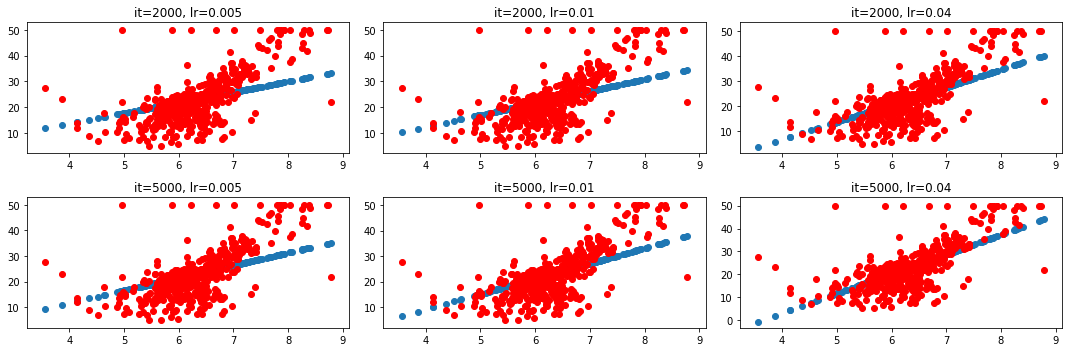

In [181]:
params = [(it, lr) for it in [2000, 5000] for lr in [0.005, 0.01, 0.04]]
fig, axs = plt.subplots(2, 3, figsize=(15, 5))
for ax, (it, lr) in zip(axs.flatten(), params):
    k, b = train_by_gradient_descend(it, lr)
    title = "it={it}, lr={lr}".format(it=it, lr=lr)
    ax.set_title(title)
    ax.scatter(X_rm, [price(r, k, b) for r in X_rm])
    ax.scatter(X_rm, y, color='red')
fig.tight_layout()

#### 1.4 Try different Loss function and learning rate.

In [182]:
def mean_absolute_error(y, y_hat):
    return np.abs(y_hat - y).sum() / y.size

In [184]:
def supervised_direction(scalar, loss_func):
    min_loss = float('inf')
    trying_times = 2000

    best_k = np.random.random() * 200 - 100
    best_b = np.random.random() * 200 - 100

    direction = [
        (+1, -1),
        (+1, +1),
        (-1, -1),
        (-1, +1)
    ]

    next_direction = random.choice(direction)

    for i in range(trying_times):
        k_direction, b_direction = next_direction
        current_k, current_b = best_k + scalar * k_direction, best_b + scalar * b_direction
        price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
        current_loss = loss_func(y, price_by_k_and_b)

        if current_loss < min_loss:
            best_k, best_b = current_k, current_b
            min_loss = current_loss

            print('When time is : {time}, get best_k: {k} best_b: {b}, and the loss is: {loss}'.format(time=i, k=best_k, b=best_b, loss=min_loss))
        else:
            next_direction = random.choice(direction)
    return best_k, best_b

When time is : 0, get best_k: 58.15781736576944 best_b: 14.66579645894216, and the loss is: 64565.52572214623
When time is : 2, get best_k: 58.15281736576944 best_b: 14.660796458942158, and the loss is: 64552.37939363186
When time is : 3, get best_k: 58.147817365769434 best_b: 14.655796458942158, and the loss is: 64539.234404082345
When time is : 4, get best_k: 58.14281736576943 best_b: 14.650796458942157, and the loss is: 64526.09075349757
When time is : 5, get best_k: 58.13781736576943 best_b: 14.645796458942156, and the loss is: 64512.94844187758
When time is : 6, get best_k: 58.13281736576943 best_b: 14.640796458942155, and the loss is: 64499.807469222564
When time is : 7, get best_k: 58.127817365769424 best_b: 14.635796458942155, and the loss is: 64486.6678355323
When time is : 8, get best_k: 58.12281736576942 best_b: 14.630796458942154, and the loss is: 64473.529540806834
When time is : 9, get best_k: 58.11781736576942 best_b: 14.625796458942153, and the loss is: 64460.3925850462

When time is : 469, get best_k: 55.81781736576824 best_b: 12.325796458941793, and the loss is: 58559.36337656192
When time is : 470, get best_k: 55.81281736576824 best_b: 12.320796458941793, and the loss is: 58546.84368359
When time is : 471, get best_k: 55.80781736576824 best_b: 12.315796458941792, and the loss is: 58534.3253295829
When time is : 472, get best_k: 55.802817365768234 best_b: 12.310796458941791, and the loss is: 58521.808314540634
When time is : 473, get best_k: 55.79781736576823 best_b: 12.30579645894179, and the loss is: 58509.29263846315
When time is : 474, get best_k: 55.79281736576823 best_b: 12.30079645894179, and the loss is: 58496.77830135053
When time is : 475, get best_k: 55.78781736576823 best_b: 12.295796458941789, and the loss is: 58484.265303202716
When time is : 476, get best_k: 55.782817365768224 best_b: 12.290796458941788, and the loss is: 58471.753644019795
When time is : 477, get best_k: 55.77781736576822 best_b: 12.285796458941787, and the loss is: 58

When time is : 935, get best_k: 53.48781736576705 best_b: 9.99579645894143, and the loss is: 52870.2565966074
When time is : 936, get best_k: 53.48281736576705 best_b: 9.990796458941428, and the loss is: 52858.36086124816
When time is : 937, get best_k: 53.477817365767045 best_b: 9.985796458941428, and the loss is: 52846.46646485386
When time is : 938, get best_k: 53.47281736576704 best_b: 9.980796458941427, and the loss is: 52834.573407424374
When time is : 939, get best_k: 53.46781736576704 best_b: 9.975796458941426, and the loss is: 52822.68168895979
When time is : 940, get best_k: 53.46281736576704 best_b: 9.970796458941425, and the loss is: 52810.79130945992
When time is : 941, get best_k: 53.457817365767035 best_b: 9.965796458941425, and the loss is: 52798.90226892497
When time is : 942, get best_k: 53.45281736576703 best_b: 9.960796458941424, and the loss is: 52787.014567354854
When time is : 943, get best_k: 53.44781736576703 best_b: 9.955796458941423, and the loss is: 52775.12

When time is : 1369, get best_k: 51.31781736576594 best_b: 7.825796458941121, and the loss is: 47833.31792553427
When time is : 1370, get best_k: 51.31281736576594 best_b: 7.820796458941121, and the loss is: 47822.00330091323
When time is : 1371, get best_k: 51.307817365765935 best_b: 7.815796458941121, and the loss is: 47810.69001525701
When time is : 1372, get best_k: 51.30281736576593 best_b: 7.810796458941121, and the loss is: 47799.378068565624
When time is : 1373, get best_k: 51.29781736576593 best_b: 7.8057964589411215, and the loss is: 47788.06746083912
When time is : 1374, get best_k: 51.29281736576593 best_b: 7.800796458941122, and the loss is: 47776.75819207741
When time is : 1375, get best_k: 51.287817365765925 best_b: 7.795796458941122, and the loss is: 47765.450262280516
When time is : 1376, get best_k: 51.28281736576592 best_b: 7.790796458941122, and the loss is: 47754.14367144847
When time is : 1377, get best_k: 51.27781736576592 best_b: 7.785796458941122, and the loss 

When time is : 1932, get best_k: 48.5028173657645 best_b: 5.010796458941181, and the loss is: 41675.01251757035
When time is : 1933, get best_k: 48.4978173657645 best_b: 5.005796458941181, and the loss is: 41664.451730151035
When time is : 1934, get best_k: 48.492817365764495 best_b: 5.000796458941181, and the loss is: 41653.8922816965
When time is : 1935, get best_k: 48.48781736576449 best_b: 4.995796458941181, and the loss is: 41643.33417220689
When time is : 1936, get best_k: 48.48281736576449 best_b: 4.9907964589411815, and the loss is: 41632.777401682084
When time is : 1937, get best_k: 48.47781736576449 best_b: 4.985796458941182, and the loss is: 41622.221970122046
When time is : 1938, get best_k: 48.472817365764485 best_b: 4.980796458941182, and the loss is: 41611.66787752696
When time is : 1939, get best_k: 48.46781736576448 best_b: 4.975796458941182, and the loss is: 41601.11512389661
When time is : 1940, get best_k: 48.46281736576448 best_b: 4.970796458941182, and the loss is

When time is : 336, get best_k: -42.374834808572054 best_b: -77.17849403411105, and the loss is: 67660.51289457515
When time is : 337, get best_k: -42.364834808572056 best_b: -77.16849403411105, and the loss is: 67633.59860949547
When time is : 338, get best_k: -42.35483480857206 best_b: -77.15849403411104, and the loss is: 67606.68968027526
When time is : 339, get best_k: -42.34483480857206 best_b: -77.14849403411104, and the loss is: 67579.78610691438
When time is : 340, get best_k: -42.33483480857206 best_b: -77.13849403411103, and the loss is: 67552.8878894128
When time is : 341, get best_k: -42.324834808572064 best_b: -77.12849403411103, and the loss is: 67525.9950277705
When time is : 342, get best_k: -42.314834808572066 best_b: -77.11849403411102, and the loss is: 67499.10752198768
When time is : 343, get best_k: -42.30483480857207 best_b: -77.10849403411102, and the loss is: 67472.22537206412
When time is : 344, get best_k: -42.29483480857207 best_b: -77.09849403411101, and the

When time is : 934, get best_k: -36.39483480857324 best_b: -71.198494034108, and the loss is: 52521.80737627506
When time is : 935, get best_k: -36.384834808573245 best_b: -71.18849403410799, and the loss is: 52498.0958950792
When time is : 936, get best_k: -36.37483480857325 best_b: -71.17849403410798, and the loss is: 52474.38976974266
When time is : 937, get best_k: -36.36483480857325 best_b: -71.16849403410798, and the loss is: 52450.68900026546
When time is : 938, get best_k: -36.35483480857325 best_b: -71.15849403410797, and the loss is: 52426.99358664763
When time is : 939, get best_k: -36.34483480857325 best_b: -71.14849403410797, and the loss is: 52403.30352888917
When time is : 940, get best_k: -36.334834808573255 best_b: -71.13849403410796, and the loss is: 52379.61882698998
When time is : 941, get best_k: -36.32483480857326 best_b: -71.12849403410796, and the loss is: 52355.93948095014
When time is : 942, get best_k: -36.31483480857326 best_b: -71.11849403410795, and the lo

When time is : 1433, get best_k: -31.404834808574023 best_b: -66.20849403410544, and the loss is: 41355.24913806816
When time is : 1434, get best_k: -31.39483480857402 best_b: -66.19849403410544, and the loss is: 41334.210230681674
When time is : 1435, get best_k: -31.38483480857402 best_b: -66.18849403410543, and the loss is: 41313.176679154494
When time is : 1436, get best_k: -31.37483480857402 best_b: -66.17849403410543, and the loss is: 41292.14848348666
When time is : 1437, get best_k: -31.364834808574017 best_b: -66.16849403410542, and the loss is: 41271.12564367815
When time is : 1438, get best_k: -31.354834808574015 best_b: -66.15849403410542, and the loss is: 41250.10815972901
When time is : 1439, get best_k: -31.344834808574014 best_b: -66.14849403410541, and the loss is: 41229.096031639136
When time is : 1440, get best_k: -31.334834808574012 best_b: -66.1384940341054, and the loss is: 41208.089259408596
When time is : 1441, get best_k: -31.32483480857401 best_b: -66.12849403

When time is : 1933, get best_k: -26.40483480857324 best_b: -61.20849403410487, and the loss is: 31503.938897141972
When time is : 1934, get best_k: -26.39483480857324 best_b: -61.198494034104876, and the loss is: 31485.577919424104
When time is : 1935, get best_k: -26.38483480857324 best_b: -61.18849403410488, and the loss is: 31467.222297565597
When time is : 1936, get best_k: -26.374834808573237 best_b: -61.17849403410488, and the loss is: 31448.872031566443
When time is : 1937, get best_k: -26.364834808573235 best_b: -61.16849403410488, and the loss is: 31430.52712142661
When time is : 1938, get best_k: -26.354834808573234 best_b: -61.15849403410488, and the loss is: 31412.187567146128
When time is : 1939, get best_k: -26.344834808573232 best_b: -61.148494034104885, and the loss is: 31393.853368724955
When time is : 1940, get best_k: -26.33483480857323 best_b: -61.13849403410489, and the loss is: 31375.524526163135
When time is : 1941, get best_k: -26.32483480857323 best_b: -61.128

When time is : 432, get best_k: 40.68896613934481 best_b: 25.827656852678537, and the loss is: 33810.711329339974
When time is : 433, get best_k: 40.64896613934481 best_b: 25.867656852678536, and the loss is: 33755.36060484047
When time is : 434, get best_k: 40.60896613934481 best_b: 25.907656852678535, and the loss is: 33700.05535243028
When time is : 435, get best_k: 40.56896613934481 best_b: 25.947656852678534, and the loss is: 33644.795572109426
When time is : 436, get best_k: 40.52896613934481 best_b: 25.987656852678533, and the loss is: 33589.58126387792
When time is : 437, get best_k: 40.48896613934481 best_b: 26.027656852678533, and the loss is: 33534.41242773564
When time is : 438, get best_k: 40.44896613934481 best_b: 26.06765685267853, and the loss is: 33479.28906368275
When time is : 439, get best_k: 40.40896613934481 best_b: 26.10765685267853, and the loss is: 33424.21117171916
When time is : 440, get best_k: 40.36896613934481 best_b: 26.14765685267853, and the loss is: 33

When time is : 932, get best_k: 20.688966139345233 best_b: 45.82765685267811, and the loss is: 11807.99222208173
When time is : 933, get best_k: 20.648966139345234 best_b: 45.86765685267811, and the loss is: 11775.377542241526
When time is : 934, get best_k: 20.608966139345235 best_b: 45.90765685267811, and the loss is: 11742.80833449063
When time is : 935, get best_k: 20.568966139345235 best_b: 45.94765685267811, and the loss is: 11710.284598829037
When time is : 936, get best_k: 20.528966139345236 best_b: 45.98765685267811, and the loss is: 11677.80633525678
When time is : 937, get best_k: 20.488966139345237 best_b: 46.027656852678106, and the loss is: 11645.37354377385
When time is : 938, get best_k: 20.448966139345238 best_b: 46.067656852678105, and the loss is: 11612.986224380216
When time is : 939, get best_k: 20.40896613934524 best_b: 46.107656852678105, and the loss is: 11580.644377075914
When time is : 940, get best_k: 20.36896613934524 best_b: 46.147656852678104, and the loss

When time is : 1431, get best_k: 0.7289661393454967 best_b: 65.787656852678, and the loss is: 1183.2195517374753
When time is : 1432, get best_k: 0.6889661393454967 best_b: 65.827656852678, and the loss is: 1173.29544446723
When time is : 1433, get best_k: 0.6489661393454966 best_b: 65.86765685267801, and the loss is: 1163.4168092863051
When time is : 1434, get best_k: 0.6089661393454966 best_b: 65.90765685267802, and the loss is: 1153.583646194699
When time is : 1435, get best_k: 0.5689661393454966 best_b: 65.94765685267802, and the loss is: 1143.7959551924089
When time is : 1436, get best_k: 0.5289661393454965 best_b: 65.98765685267803, and the loss is: 1134.0537362794407
When time is : 1437, get best_k: 0.48896613934549654 best_b: 66.02765685267804, and the loss is: 1124.3569894557875
When time is : 1438, get best_k: 0.44896613934549656 best_b: 66.06765685267804, and the loss is: 1114.7057147214566
When time is : 1439, get best_k: 0.4089661393454966 best_b: 66.10765685267805, and th

When time is : 1995, get best_k: -7.431033860654508 best_b: 70.42765685267872, and the loss is: 89.85036106604018
When time is : 1997, get best_k: -7.391033860654508 best_b: 70.38765685267872, and the loss is: 89.79955768287448
When time is : 1998, get best_k: -7.351033860654508 best_b: 70.34765685267871, and the loss is: 89.79422638902746
When time is : 0, get best_k: -30.319812732745792 best_b: -39.21877021011751, and the loss is: 252.3005142525087
When time is : 2, get best_k: -30.314812732745793 best_b: -39.21377021011751, and the loss is: 252.26409108057192
When time is : 3, get best_k: -30.309812732745794 best_b: -39.20877021011751, and the loss is: 252.22766790863517
When time is : 4, get best_k: -30.304812732745795 best_b: -39.203770210117504, and the loss is: 252.19124473669845
When time is : 5, get best_k: -30.299812732745796 best_b: -39.1987702101175, and the loss is: 252.15482156476165
When time is : 6, get best_k: -30.294812732745797 best_b: -39.1937702101175, and the loss

When time is : 501, get best_k: -27.81981273274629 best_b: -36.71877021011623, and the loss is: 234.08892828413107
When time is : 502, get best_k: -27.81481273274629 best_b: -36.71377021011623, and the loss is: 234.05250511219435
When time is : 503, get best_k: -27.80981273274629 best_b: -36.70877021011623, and the loss is: 234.01608194025755
When time is : 504, get best_k: -27.804812732746292 best_b: -36.703770210116225, and the loss is: 233.97965876832083
When time is : 505, get best_k: -27.799812732746293 best_b: -36.69877021011622, and the loss is: 233.94323559638408
When time is : 506, get best_k: -27.794812732746294 best_b: -36.69377021011622, and the loss is: 233.9068124244473
When time is : 507, get best_k: -27.789812732746295 best_b: -36.68877021011622, and the loss is: 233.87038925251056
When time is : 508, get best_k: -27.784812732746296 best_b: -36.683770210116215, and the loss is: 233.83396608057382
When time is : 509, get best_k: -27.779812732746297 best_b: -36.6787702101

When time is : 1127, get best_k: -24.689812732746912 best_b: -33.58877021011463, and the loss is: 211.28802265172234
When time is : 1128, get best_k: -24.684812732746913 best_b: -33.58377021011463, and the loss is: 211.25159947978557
When time is : 1129, get best_k: -24.679812732746914 best_b: -33.57877021011463, and the loss is: 211.21517630784882
When time is : 1130, get best_k: -24.674812732746915 best_b: -33.573770210114624, and the loss is: 211.17875313591205
When time is : 1131, get best_k: -24.669812732746916 best_b: -33.56877021011462, and the loss is: 211.1423299639753
When time is : 1132, get best_k: -24.664812732746917 best_b: -33.56377021011462, and the loss is: 211.10590679203858
When time is : 1133, get best_k: -24.659812732746918 best_b: -33.558770210114616, and the loss is: 211.0694836201018
When time is : 1134, get best_k: -24.65481273274692 best_b: -33.553770210114614, and the loss is: 211.03306044816503
When time is : 1135, get best_k: -24.64981273274692 best_b: -33.

When time is : 1674, get best_k: -21.954812732747456 best_b: -30.85377021011405, and the loss is: 191.36454760231805
When time is : 1675, get best_k: -21.949812732747457 best_b: -30.84877021011405, and the loss is: 191.32812443038134
When time is : 1676, get best_k: -21.944812732747458 best_b: -30.84377021011405, and the loss is: 191.29170125844456
When time is : 1677, get best_k: -21.93981273274746 best_b: -30.838770210114053, and the loss is: 191.25527808650781
When time is : 1678, get best_k: -21.93481273274746 best_b: -30.833770210114054, and the loss is: 191.21885491457107
When time is : 1679, get best_k: -21.92981273274746 best_b: -30.828770210114055, and the loss is: 191.1824317426343
When time is : 1680, get best_k: -21.924812732747462 best_b: -30.823770210114056, and the loss is: 191.14600857069755
When time is : 1681, get best_k: -21.919812732747463 best_b: -30.818770210114057, and the loss is: 191.10958539876077
When time is : 1682, get best_k: -21.914812732747464 best_b: -3

When time is : 377, get best_k: -50.57093790186784 best_b: -42.67240601407458, and the loss is: 383.02506767689533
When time is : 378, get best_k: -50.560937901867845 best_b: -42.68240601407458, and the loss is: 382.9722213330218
When time is : 379, get best_k: -50.55093790186785 best_b: -42.69240601407458, and the loss is: 382.9193749891483
When time is : 380, get best_k: -50.54093790186785 best_b: -42.702406014074576, and the loss is: 382.8665286452748
When time is : 381, get best_k: -50.53093790186785 best_b: -42.712406014074574, and the loss is: 382.8136823014013
When time is : 382, get best_k: -50.52093790186785 best_b: -42.72240601407457, and the loss is: 382.76083595752783
When time is : 383, get best_k: -50.510937901867855 best_b: -42.73240601407457, and the loss is: 382.7079896136543
When time is : 384, get best_k: -50.50093790186786 best_b: -42.74240601407457, and the loss is: 382.65514326978075
When time is : 385, get best_k: -50.49093790186786 best_b: -42.752406014074566, a

When time is : 1119, get best_k: -43.15093790186932 best_b: -50.092406014073106, and the loss is: 343.8130805227529
When time is : 1120, get best_k: -43.14093790186932 best_b: -50.102406014073104, and the loss is: 343.7602341788794
When time is : 1121, get best_k: -43.13093790186932 best_b: -50.1124060140731, and the loss is: 343.70738783500593
When time is : 1122, get best_k: -43.120937901869326 best_b: -50.1224060140731, and the loss is: 343.65454149113236
When time is : 1123, get best_k: -43.11093790186933 best_b: -50.1324060140731, and the loss is: 343.6016951472589
When time is : 1124, get best_k: -43.10093790186933 best_b: -50.142406014073096, and the loss is: 343.54884880338534
When time is : 1125, get best_k: -43.09093790186933 best_b: -50.152406014073094, and the loss is: 343.4960024595118
When time is : 1126, get best_k: -43.08093790186933 best_b: -50.16240601407309, and the loss is: 343.4431561156384
When time is : 1127, get best_k: -43.070937901869335 best_b: -50.1724060140

When time is : 1674, get best_k: -37.600937901870424 best_b: -55.642406014072, and the loss is: 314.4833596729564
When time is : 1675, get best_k: -37.590937901870426 best_b: -55.652406014072, and the loss is: 314.4305133290828
When time is : 1676, get best_k: -37.58093790187043 best_b: -55.662406014072, and the loss is: 314.3776669852094
When time is : 1677, get best_k: -37.57093790187043 best_b: -55.672406014071996, and the loss is: 314.32482064133586
When time is : 1678, get best_k: -37.56093790187043 best_b: -55.682406014071994, and the loss is: 314.27197429746235
When time is : 1679, get best_k: -37.550937901870434 best_b: -55.69240601407199, and the loss is: 314.21912795358884
When time is : 1680, get best_k: -37.540937901870436 best_b: -55.70240601407199, and the loss is: 314.1662816097153
When time is : 1681, get best_k: -37.53093790187044 best_b: -55.71240601407199, and the loss is: 314.1134352658418
When time is : 1682, get best_k: -37.52093790187044 best_b: -55.7224060140719

When time is : 281, get best_k: 74.5794329390107 best_b: -30.95082799316816, and the loss is: 415.22083452042375
When time is : 282, get best_k: 74.5394329390107 best_b: -30.910827993168162, and the loss is: 415.0094491449296
When time is : 283, get best_k: 74.49943293901069 best_b: -30.870827993168163, and the loss is: 414.7980637694355
When time is : 284, get best_k: 74.45943293901068 best_b: -30.830827993168164, and the loss is: 414.58667839394144
When time is : 285, get best_k: 74.41943293901068 best_b: -30.790827993168165, and the loss is: 414.3752930184473
When time is : 286, get best_k: 74.37943293901067 best_b: -30.750827993168166, and the loss is: 414.1639076429532
When time is : 287, get best_k: 74.33943293901066 best_b: -30.710827993168166, and the loss is: 413.9525222674591
When time is : 288, get best_k: 74.29943293901066 best_b: -30.670827993168167, and the loss is: 413.7411368919649
When time is : 289, get best_k: 74.25943293901065 best_b: -30.630827993168168, and the lo

When time is : 894, get best_k: 50.05943293900935 best_b: -6.4308279931686485, and the loss is: 285.6415993425491
When time is : 895, get best_k: 50.01943293900935 best_b: -6.3908279931686485, and the loss is: 285.43021396705507
When time is : 896, get best_k: 49.97943293900935 best_b: -6.350827993168648, and the loss is: 285.218828591561
When time is : 897, get best_k: 49.93943293900935 best_b: -6.310827993168648, and the loss is: 285.007443216067
When time is : 898, get best_k: 49.89943293900935 best_b: -6.270827993168648, and the loss is: 284.7960578405728
When time is : 899, get best_k: 49.85943293900935 best_b: -6.230827993168648, and the loss is: 284.58467246507877
When time is : 900, get best_k: 49.81943293900935 best_b: -6.190827993168648, and the loss is: 284.3732870895848
When time is : 901, get best_k: 49.779432939009354 best_b: -6.150827993168648, and the loss is: 284.1619017140907
When time is : 902, get best_k: 49.739432939009355 best_b: -6.110827993168648, and the loss i

When time is : 1511, get best_k: 25.379432939009874 best_b: 18.249172006831145, and the loss is: 155.21682266271034
When time is : 1512, get best_k: 25.339432939009875 best_b: 18.289172006831144, and the loss is: 155.00543728721627
When time is : 1513, get best_k: 25.299432939009876 best_b: 18.329172006831143, and the loss is: 154.79405191172222
When time is : 1514, get best_k: 25.259432939009876 best_b: 18.369172006831143, and the loss is: 154.58266653622815
When time is : 1515, get best_k: 25.219432939009877 best_b: 18.40917200683114, and the loss is: 154.37128116073407
When time is : 1516, get best_k: 25.179432939009878 best_b: 18.44917200683114, and the loss is: 154.15989578524
When time is : 1517, get best_k: 25.13943293900988 best_b: 18.48917200683114, and the loss is: 153.94851040974592
When time is : 1518, get best_k: 25.09943293900988 best_b: 18.52917200683114, and the loss is: 153.73712503425187
When time is : 1519, get best_k: 25.05943293900988 best_b: 18.56917200683114, and

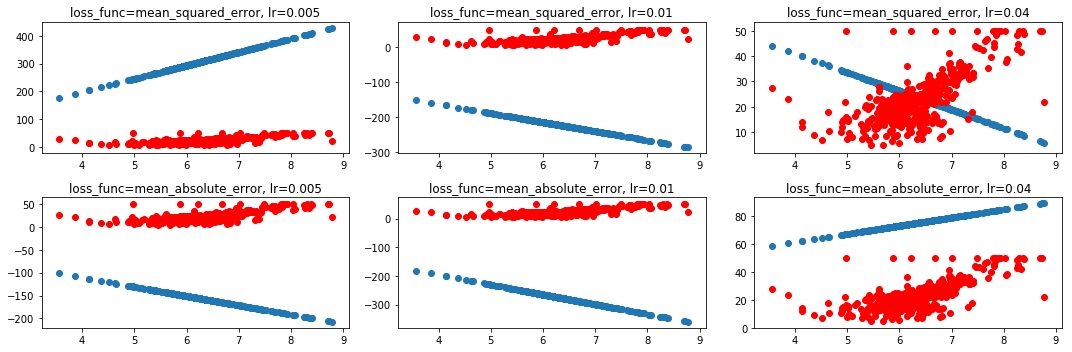

In [187]:
params = [(loss, lr) for loss in [mean_squared_error, mean_absolute_error] for lr in [0.005, 0.01, 0.04]]
fig, axs = plt.subplots(2, 3, figsize=(15, 5))
for ax, (loss, lr) in zip(axs.flatten(), params):
    k, b = supervised_direction(lr, loss)
    title = "loss_func={loss_func}, lr={lr}".format(loss_func=loss.__name__, lr=lr)
    ax.set_title(title)
    ax.scatter(X_rm, [price(r, k, b) for r in X_rm])
    ax.scatter(X_rm, y, color='red')
fig.tight_layout()

### 2 问答题

### 3 search problem

In [5]:
from bs4 import BeautifulSoup as bs
import requests
import re

In [6]:
# 上海地铁百度百科
sh_metro_url = "https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%81/1273732?fr=aladdin"
headers = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36',
    'connection': 'keep-alive',
    'host': 'baike.baidu.com',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'zh-CN,zh;q=0.9,en;q=0.8',
    'upgrade-insecure-requests': '1'
}
page = requests.get(sh_metro_url, headers=headers)

In [7]:
content = page.content.decode('utf-8')
page.status_code

200

In [8]:
# soup = bs(content)
line_pattern = re.compile(r'<a target=_blank href="(/item/[\d\w%]+/\d+)" data-lemmaid="\d+">(上海[\w\d]+线)</a>')

In [9]:
all_lines = {}
for link, line in line_pattern.findall(content):
    if line in all_lines: continue
    all_lines[line] = 'https://baike.baidu.com' + link
all_lines

{'上海地铁1号线': 'https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF/12092650',
 '上海地铁2号线': 'https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%812%E5%8F%B7%E7%BA%BF/22947836',
 '上海地铁3号线': 'https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%813%E5%8F%B7%E7%BA%BF/22947837',
 '上海地铁4号线': 'https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%814%E5%8F%B7%E7%BA%BF/6310090',
 '上海地铁5号线': 'https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%815%E5%8F%B7%E7%BA%BF/22947838',
 '上海地铁6号线': 'https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%816%E5%8F%B7%E7%BA%BF/4316051',
 '上海地铁7号线': 'https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%817%E5%8F%B7%E7%BA%BF/538923',
 '上海地铁8号线': 'https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%818%E5%8F%B7%E7%BA%BF/12520383',
 '上海地铁9号线': 'https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%819%E5%8F%B7%E7%BA%BF/12423895',
 '上海地铁10号线': 'https://b

In [10]:
first_line = requests.get(all_lines['上海地铁5号线'], headers=headers)
first_line.status_code

200

In [11]:
c = first_line.content.decode('utf-8')

In [12]:
soup = bs(c)

In [13]:
def get_stations(soup):
    stations = []
    for h3 in soup.find_all('h3'):
        if h3.contents[-1] != '车站列表': continue
        par = h3.parent
        for sib in par.next_siblings:
            if sib.name == 'table':
                for s in sib.children:
                    if s.contents:
                        stat = str(s.contents[0])
                        mat = station_pattern.search(stat)
                        if mat and len(mat.group(1)) < 10 and mat.group(1) != '车站': 
                            stations.append(mat.group(1))
                return stations

In [14]:
get_stations(soup)

NameError: name 'station_pattern' is not defined

In [16]:
station_pattern = re.compile(r'<td.+>([\w\d]+站)')

In [15]:
# station_pattern = re.compile(r'<a.+>([\w\d]+站)')

In [13]:
from collections import defaultdict

In [172]:
def get_all_stations(lines):
    all_stations = defaultdict(list)
    for line, url in lines.items():
        resp = requests.get(url, headers=headers)
        contents = resp.content.decode('utf-8')
        soup = bs(contents)
        stations = get_stations(soup)
        all_stations[line].extend(stations)
    return all_stations

In [198]:
all_stations = get_all_stations(all_lines)

In [199]:
for line, stations in all_stations.items():
    print("{line}一共有{stations}个站".format(line=line, stations=len(stations)))

上海地铁1号线一共有28个站
上海地铁2号线一共有30个站
上海地铁3号线一共有29个站
上海地铁4号线一共有27个站
上海地铁5号线一共有20个站
上海地铁6号线一共有28个站
上海地铁7号线一共有33个站
上海地铁8号线一共有30个站
上海地铁9号线一共有35个站
上海地铁10号线一共有31个站
上海地铁11号线一共有39个站
上海地铁12号线一共有32个站
上海地铁13号线一共有31个站
上海地铁16号线一共有13个站
上海地铁17号线一共有13个站
上海地铁浦江线一共有6个站
上海磁浮列车示范运营线一共有2个站


* 4号线为环线
* 5号线平庄公路站，缺少奉浦大道站，由于百度百科的站字和奉浦大道4个字隔开了，导致没有匹配到，醉了
* 11号线陈翔路站尚未开通

In [200]:
# 对4号线、5号线和11号线做特殊处理
idx = all_stations['上海地铁5号线'].index('环城东路站')
all_stations['上海地铁5号线'].insert(idx, '奉浦大道站')
all_stations['上海地铁5号线'].remove('平庄公路站')
all_stations['上海地铁4号线'].pop() # 环线首尾站一样
all_stations['上海地铁11号线'].remove('陈翔路站')

In [201]:
# 处理5号线的支线
all_stations['上海地铁5号线主线'] = all_stations['上海地铁5号线'][:15]
all_stations['上海地铁5号线支线'] = all_stations['上海地铁5号线'][15:]
all_stations.pop('上海地铁5号线')

['莘庄站',
 '春申路站',
 '银都路站',
 '颛桥站',
 '北桥站',
 '剑川路站',
 '东川路站',
 '江川路站',
 '西渡站',
 '萧塘站',
 '奉浦大道站',
 '环城东路站',
 '望园路站',
 '金海湖站',
 '奉贤新城站',
 '东川路站',
 '金平路站',
 '华宁路站',
 '文井路站',
 '闵行开发区站']

In [202]:
#  处理10号线和11号线的支线段
all_stations['上海地铁11号线主线'] = all_stations['上海地铁11号线'][7:]
all_stations['上海地铁11号线支线'] = all_stations['上海地铁11号线'][:7] + [all_stations['上海地铁11号线'][10]]
all_stations.pop('上海地铁11号线')

['花桥站',
 '光明路站',
 '兆丰路站',
 '安亭站',
 '上海汽车城站',
 '昌吉东路站',
 '上海赛车场站',
 '嘉定北站',
 '嘉定西站',
 '白银路站',
 '嘉定新城站',
 '马陆站',
 '南翔站',
 '桃浦新村站',
 '武威路站',
 '祁连山路站',
 '李子园站',
 '上海西站站',
 '真如站',
 '枫桥路站',
 '曹杨路站',
 '隆德路站',
 '江苏路站',
 '交通大学站',
 '徐家汇站',
 '上海游泳馆站',
 '龙华站',
 '云锦路站',
 '龙耀路站',
 '东方体育中心站',
 '三林站',
 '三林东站',
 '浦三路站',
 '御桥站',
 '罗山路站',
 '秀沿路站',
 '康新公路站',
 '迪士尼站']

In [203]:
all_stations['上海地铁10号线主线'] = all_stations['上海地铁10号线'][3:]
all_stations['上海地铁10号线支线'] = all_stations['上海地铁10号线'][:3] + [all_stations['上海地铁10号线'][7]]
all_stations.pop('上海地铁10号线')

['航中路站',
 '紫藤路站',
 '龙柏新村站',
 '虹桥火车站站',
 '虹桥2号航站楼站',
 '虹桥1号航站楼站',
 '上海动物园站',
 '龙溪路站',
 '水城路站',
 '伊犁路站',
 '宋园路站',
 '虹桥路站',
 '交通大学站',
 '上海图书馆站',
 '陕西南路站',
 '新天地站',
 '老西门站',
 '豫园站',
 '南京东路站',
 '天潼路站',
 '四川北路站',
 '海伦路站',
 '邮电新村站',
 '四平路站',
 '同济大学站',
 '国权路站',
 '五角场站',
 '江湾体育场站',
 '三门路站',
 '殷高东路站',
 '新江湾城站']

In [204]:
for line, stations in all_stations.items():
    print("{line}一共有{stations}个站".format(line=line, stations=len(stations)))

上海地铁1号线一共有28个站
上海地铁2号线一共有30个站
上海地铁3号线一共有29个站
上海地铁4号线一共有26个站
上海地铁6号线一共有28个站
上海地铁7号线一共有33个站
上海地铁8号线一共有30个站
上海地铁9号线一共有35个站
上海地铁12号线一共有32个站
上海地铁13号线一共有31个站
上海地铁16号线一共有13个站
上海地铁17号线一共有13个站
上海地铁浦江线一共有6个站
上海磁浮列车示范运营线一共有2个站
上海地铁5号线主线一共有15个站
上海地铁5号线支线一共有5个站
上海地铁11号线主线一共有31个站
上海地铁11号线支线一共有8个站
上海地铁10号线主线一共有28个站
上海地铁10号线支线一共有4个站


In [205]:
station_connection_info = defaultdict(list)
for stations in all_stations.values():
    for i in range(len(stations)):
        if i > 0:
            station_connection_info[stations[i]].append(stations[i-1])
        if i < len(stations)-1:
            station_connection_info[stations[i]].append(stations[i+1])

In [206]:
station_connection_info

defaultdict(list,
            {'莘庄站': ['外环路站', '春申路站'],
             '外环路站': ['莘庄站', '莲花路站'],
             '莲花路站': ['外环路站', '锦江乐园站'],
             '锦江乐园站': ['莲花路站', '上海南站站'],
             '上海南站站': ['锦江乐园站', '漕宝路站', '石龙路站'],
             '漕宝路站': ['上海南站站', '上海体育馆站', '桂林公园站', '龙漕路站'],
             '上海体育馆站': ['漕宝路站', '徐家汇站', '宜山路站', '上海体育场站'],
             '徐家汇站': ['上海体育馆站', '衡山路站', '肇嘉浜路站', '宜山路站', '交通大学站', '上海游泳馆站'],
             '衡山路站': ['徐家汇站', '常熟路站'],
             '常熟路站': ['衡山路站', '陕西南路站', '静安寺站', '肇嘉浜路站'],
             '陕西南路站': ['常熟路站', '黄陂南路站', '嘉善路站', '南京西路站', '上海图书馆站', '新天地站'],
             '黄陂南路站': ['陕西南路站', '人民广场站'],
             '人民广场站': ['黄陂南路站', '新闸路站', '南京东路站', '南京西路站', '大世界站', '曲阜路站'],
             '新闸路站': ['人民广场站', '汉中路站'],
             '汉中路站': ['新闸路站', '上海火车站站', '南京西路站', '曲阜路站', '江宁路站', '自然博物馆站'],
             '上海火车站站': ['汉中路站', '中山北路站', '中潭路站', '宝山路站', '宝山路站', '中潭路站'],
             '中山北路站': ['上海火车站站', '延长路站'],
             '延长路站': ['中山北路站', '上海马戏城站'],
             '上海马戏

In [207]:
# 获取经纬度
long_lat_url = 'http://service.shmetro.com/skin/js/pca.js'
resp = requests.get(long_lat_url, headers=headers)
resp.status_code

200

In [208]:
stations_long_lat = resp.content.decode('utf-8')

In [209]:
long_lat_pat = re.compile(r'var gis = \{(.*?)\}', re.S)
station_pat = re.compile(r'var stations = \{(.*?)\}', re.S)

In [210]:
long_lat = long_lat_pat.findall(stations_long_lat)
stations = station_pat.findall(stations_long_lat)

In [211]:
id_name_map = {}
for item in stations[0].split(','):
    id_, name = item.split(':')
    id_name_map[id_[1:-1]] = name[1:-1]
id_name_map

{'0111': '莘庄',
 '0112': '外环路',
 '0113': '莲花路',
 '0114': '锦江乐园',
 '0115': '上海南站',
 '0116': '漕宝路',
 '0117': '上海体育馆',
 '0118': '徐家汇',
 '0119': '衡山路',
 '0120': '常熟路',
 '0121': '陕西南路',
 '0122': '黄陂南路',
 '0123': '人民广场',
 '0124': '新闸路',
 '0125': '汉中路',
 '0126': '上海火车站',
 '0127': '中山北路',
 '0128': '延长路',
 '0129': '上海马戏城',
 '0130': '汶水路',
 '0131': '彭浦新村',
 '0132': '共康路',
 '0133': '通河新村',
 '0134': '呼兰路',
 '0135': '共富新村',
 '0136': '宝安公路',
 '0137': '友谊西路',
 '0138': '富锦路',
 '0234': '徐泾东',
 '0235': '虹桥火车站',
 '0236': '虹桥2号航站楼',
 '0237': '淞虹路',
 '0238': '北新泾',
 '0239': '威宁路',
 '0240': '娄山关路',
 '0241': '中山公园',
 '0242': '江苏路',
 '0243': '静安寺',
 '0244': '南京西路',
 '0245': '人民广场',
 '0246': '南京东路',
 '0247': '陆家嘴',
 '0248': '东昌路',
 '0249': '世纪大道',
 '0250': '上海科技馆',
 '0251': '世纪公园',
 '0252': '龙阳路',
 '0253': '张江高科',
 '0254': '金科路',
 '0255': '广兰路',
 '0256': '唐镇',
 '0257': '创新中路',
 '0258': '华夏东路',
 '0259': '川沙',
 '0260': '凌空路',
 '0261': '远东大道',
 '0262': '海天三路',
 '0263': '浦东国际机场',
 '0311': '上海南站',
 '0312': '石龙路',
 '

In [212]:
id_long_lat_map = {}
lo_la_pat = re.compile(r'"(\d+)":"(\d+\.\d+),(\d+\.\d+)"')
for id_, long, lat in lo_la_pat.findall(long_lat[0]):
    id_long_lat_map[id_] = (float(long), float(lat))
id_long_lat_map

{'0111': (121.391832, 31.116809),
 '0112': (121.399814, 31.126929),
 '0113': (121.409334, 31.136734),
 '0114': (121.42068, 31.148312),
 '0115': (121.43627, 31.161142),
 '0116': (121.44187, 31.175383),
 '0117': (121.442801, 31.188348),
 '0118': (121.444749, 31.199152),
 '0119': (121.453247, 31.211777),
 '0120': (121.457719, 31.219937),
 '0121': (121.466688, 31.223492),
 '0122': (121.479798, 31.228753),
 '0123': (121.48085, 31.23868),
 '0124': (121.474802, 31.244699),
 '0125': (121.465, 31.247808),
 '0126': (121.462366, 31.253608),
 '0127': (121.465616, 31.265275),
 '0128': (121.461893, 31.27806),
 '0129': (121.458503, 31.285845),
 '0130': (121.456458, 31.29917),
 '0131': (121.455097, 31.312943),
 '0132': (121.453464, 31.325355),
 '0133': (121.447817, 31.337798),
 '0134': (121.444185, 31.345991),
 '0135': (121.440458, 31.361557),
 '0136': (121.437357, 31.376207),
 '0137': (121.434336, 31.38774),
 '0138': (121.43103, 31.398683),
 '0234': (121.307524, 31.195431),
 '0235': (121.32795, 31.19

In [213]:
len(id_name_map), len(id_long_lat_map)

(423, 313)

In [214]:
station_coordinates = defaultdict(tuple)
for id_, name in id_name_map.items():
    if id_ not in id_long_lat_map: continue
    station_coordinates[name+'站'] = id_long_lat_map[id_]
station_coordinates

defaultdict(tuple,
            {'莘庄站': (121.391832, 31.116809),
             '外环路站': (121.399814, 31.126929),
             '莲花路站': (121.409334, 31.136734),
             '锦江乐园站': (121.42068, 31.148312),
             '上海南站站': (121.437159, 31.159648),
             '漕宝路站': (121.44187, 31.175383),
             '上海体育馆站': (121.443402, 31.188814),
             '徐家汇站': (121.442314, 31.201202),
             '衡山路站': (121.453247, 31.211777),
             '常熟路站': (121.456628, 31.219964),
             '陕西南路站': (121.464494, 31.220991),
             '黄陂南路站': (121.479798, 31.228753),
             '人民广场站': (121.481738, 31.238695),
             '新闸路站': (121.474802, 31.244699),
             '汉中路站': (121.465, 31.247808),
             '上海火车站站': (121.46396, 31.255155),
             '中山北路站': (121.465616, 31.265275),
             '延长路站': (121.461893, 31.27806),
             '上海马戏城站': (121.458503, 31.285845),
             '汶水路站': (121.456458, 31.29917),
             '彭浦新村站': (121.455097, 31.312943),
           

In [215]:
len(station_coordinates), len(station_connection_info)

(261, 345)

In [216]:
# 舍弃掉没有经纬度的站
station_connection_info = defaultdict(list)
for stations in all_stations.values():
    for i in range(len(stations)):
        if stations[i] not in station_coordinates: continue
        if i > 0 and stations[i-1] in station_coordinates:
            station_connection_info[stations[i]].append(stations[i-1])
        if i < len(stations)-1 and stations[i+1] in station_coordinates:
            station_connection_info[stations[i]].append(stations[i+1])
station_connection_info

defaultdict(list,
            {'莘庄站': ['外环路站', '春申路站'],
             '外环路站': ['莘庄站', '莲花路站'],
             '莲花路站': ['外环路站', '锦江乐园站'],
             '锦江乐园站': ['莲花路站', '上海南站站'],
             '上海南站站': ['锦江乐园站', '漕宝路站', '石龙路站'],
             '漕宝路站': ['上海南站站', '上海体育馆站', '龙漕路站'],
             '上海体育馆站': ['漕宝路站', '徐家汇站', '宜山路站', '上海体育场站'],
             '徐家汇站': ['上海体育馆站', '衡山路站', '肇嘉浜路站', '宜山路站', '交通大学站', '上海游泳馆站'],
             '衡山路站': ['徐家汇站', '常熟路站'],
             '常熟路站': ['衡山路站', '陕西南路站', '静安寺站', '肇嘉浜路站'],
             '陕西南路站': ['常熟路站', '黄陂南路站', '嘉善路站', '南京西路站', '上海图书馆站', '新天地站'],
             '黄陂南路站': ['陕西南路站', '人民广场站'],
             '人民广场站': ['黄陂南路站', '新闸路站', '南京东路站', '南京西路站', '大世界站', '曲阜路站'],
             '新闸路站': ['人民广场站', '汉中路站'],
             '汉中路站': ['新闸路站', '上海火车站站', '南京西路站', '曲阜路站'],
             '上海火车站站': ['汉中路站', '中山北路站', '中潭路站', '宝山路站', '宝山路站', '中潭路站'],
             '中山北路站': ['上海火车站站', '延长路站'],
             '延长路站': ['中山北路站', '上海马戏城站'],
             '上海马戏城站': ['延长路站', '汶水路站'],
    

In [217]:
len(station_coordinates), len(station_connection_info)

(261, 257)

In [218]:
import math

In [219]:
def geo_distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [220]:
def get_geo_distance(station1, station2):
    return geo_distance(station_coordinates[station1], station_coordinates[station2])

In [221]:
get_geo_distance('四平路站', '同济大学站')

0.6749695453122704

In [222]:
import networkx as nx

In [223]:
station_graph = nx.Graph()

In [224]:
station_graph.add_nodes_from(list(station_coordinates.keys()))

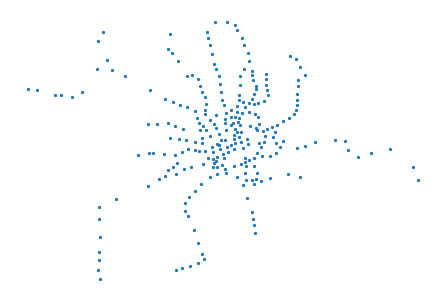

In [225]:
nx.draw(station_graph, station_coordinates, node_size=5)

In [226]:
station_with_road = nx.Graph(station_connection_info)

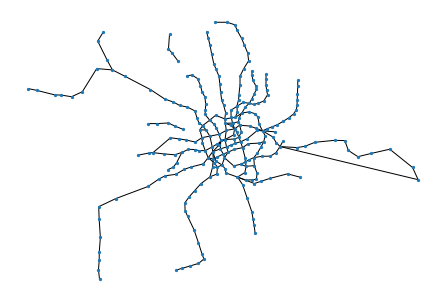

In [227]:
nx.draw(station_with_road, station_coordinates, node_size=5)

In [228]:
from collections import deque

In [323]:
def print_route(prev, start, destination):
    route = deque([destination])
    while prev[destination] != start:
        destination = prev[destination]
        route.appendleft(destination)
    route.appendleft(start)
    print('🚈'.join(route))

def search(start, destination, connection_graph):
    visited = {start}
    q = deque([start])
    prev = {}
    while q:
        station = q.popleft()
        for next_ in connection_graph[station]:
            if next_ in visited: continue
            prev[next_] = station
            if next_ == destination:
                print_route(prev, start, destination)
                return
            visited.add(next_)
            q.append(next_)
    print('无法到达！！！')


def search_bfs(start, destination, connection_graph):
    visited = set()
    routes = deque([[start]])
    while routes:
        cur = routes.pop()
        frontier = cur[-1]
        for next_ in connection_graph[frontier]:
            if next_ in visited or next_ in cur: continue
            new_route = cur + [next_]
            if next_ == destination: 
                print('🚈'.join(new_route))
                return 
            routes.appendleft(new_route)
        visited.add(frontier)
    print('无法到达！！！')
    

def search_dfs(start, destination, connection_graph):
    visited = set()
    routes = [[start]]
    while routes:
        cur = routes.pop()
        frontier = cur[-1]
        for next_ in connection_graph[frontier]:
            if next_ in visited or next_ in cur: continue
            new_route = cur + [next_]
            if next_ == destination: 
                print('🚈'.join(new_route))
                return 
            routes.append(new_route)
        visited.add(frontier)
    print('无法到达！！！')

In [324]:
search('同济大学站', '沈杜公路站', station_connection_info)

同济大学站🚈四平路站🚈邮电新村站🚈海伦路站🚈宝山路站🚈上海火车站站🚈汉中路站🚈南京西路站🚈陕西南路站🚈嘉善路站🚈大木桥路站🚈龙华中路站🚈龙华站🚈云锦路站🚈龙耀路站🚈东方体育中心站🚈凌兆新村站🚈芦恒路站🚈浦江镇站🚈江月路站🚈联航路站🚈沈杜公路站


In [325]:
search_bfs('同济大学站', '沈杜公路站', station_connection_info)

同济大学站🚈四平路站🚈邮电新村站🚈海伦路站🚈宝山路站🚈上海火车站站🚈汉中路站🚈南京西路站🚈陕西南路站🚈嘉善路站🚈大木桥路站🚈龙华中路站🚈龙华站🚈云锦路站🚈龙耀路站🚈东方体育中心站🚈凌兆新村站🚈芦恒路站🚈浦江镇站🚈江月路站🚈联航路站🚈沈杜公路站


In [326]:
search_dfs('同济大学站', '沈杜公路站', station_connection_info)

同济大学站🚈四平路站🚈邮电新村站🚈海伦路站🚈四川北路站🚈天潼路站🚈南京东路站🚈豫园站🚈老西门站🚈新天地站🚈陕西南路站🚈上海图书馆站🚈交通大学站🚈虹桥路站🚈宋园路站🚈伊犁路站🚈水城路站🚈龙溪路站🚈上海动物园站🚈虹桥1号航站楼站🚈虹桥2号航站楼站🚈淞虹路站🚈北新泾站🚈威宁路站🚈娄山关路站🚈中山公园站🚈金沙江路站🚈隆德路站🚈江苏路站🚈静安寺站🚈常熟路站🚈肇嘉浜路站🚈徐家汇站🚈上海游泳馆站🚈龙华站🚈云锦路站🚈龙耀路站🚈东方体育中心站🚈凌兆新村站🚈芦恒路站🚈浦江镇站🚈江月路站🚈联航路站🚈沈杜公路站


### 4 （Optional）Create different policies for transfer system

In [271]:
import heapq

In [320]:
def get_route(prev, start, destination):
    route = deque([destination])
    while prev[destination] != start:
        destination = prev[destination]
        route.appendleft(destination)
    route.appendleft(start)
    return route

def search_base_on_dijkstra(start, destination, connection_graph):
    """最短距离"""
    prev = {} # 记录上一站
    station_dist = {start: 0} # 记录某一站与起点的最近距离
    min_dist_heap = [[0, start]] # 小顶堆
    while min_dist_heap:
        dist, station = heapq.heappop(min_dist_heap) # 拿出当前距离起点最近的站点
        if station == destination:
            route = get_route(prev, start, destination)
            print('🚈'.join(route))
            return 
        for next_ in connection_graph[station]:
            tmp_dist = get_geo_distance(station, next_) + dist
            if next_ in station_dist and tmp_dist < station_dist[next_]: # 已经更新过则与原距离比较，更新则更新
                station_dist[next_] = tmp_dist
                prev[next_] = station
                for i in range(len(min_dist_heap)):
                    d, s = min_dist_heap[i]
                    if s == next_:
                        min_dist_heap[i][0] = tmp_dist
                        break
            elif next_ not in station_dist:
                heapq.heappush(min_dist_heap, [tmp_dist, next_])
                prev[next_] = station
                station_dist[next_] = tmp_dist
                
    print('无法到达！！！') 

In [322]:
search_base_on_dijkstra('同济大学站', '沈杜公路站', station_connection_info)

同济大学站🚈四平路站🚈邮电新村站🚈海伦路站🚈四川北路站🚈天潼路站🚈南京东路站🚈豫园站🚈老西门站🚈陆家浜路站🚈西藏南路站🚈中华艺术宫站🚈耀华路站🚈成山路站🚈杨思站🚈东方体育中心站🚈凌兆新村站🚈芦恒路站🚈浦江镇站🚈江月路站🚈联航路站🚈沈杜公路站


In [1]:
# TODO 最少换乘，如果某一站可以达到的站数量超过 2 则意味者这是一个换乘站，并不需要通过爬虫得到哪个是换乘站

def get_distance(route):
    distance = 0
    for i in range(1, len(route)):
        distance += get_geo_distance(route[i-1], route[i])
    return distance

def search_bfs(start, destination, connection_graph, strategy, by_way=[]):
#     visited = set()
    routes = [[start]]
    while routes:
        cur = routes.pop()
        frontier = cur[-1]
        for next_ in connection_graph[frontier]:
            if next_ in cur: continue
            new_route = cur + [next_]
            if next_ == destination: 
                for s in by_way:
                    if s not in new_route:
                        break
                else:
                    print('🚈'.join(new_route))
                    return
            else:
                routes.append(new_route)
        routes.sort(key=strategy, reverse=True)
#         visited.add(frontier)
    print('无法到达！！！')

In [2]:
search_bfs('同济大学站', '老西门站', station_connection_info, get_distance, by_way=['曲阳路站'])

NameError: name 'station_connection_info' is not defined